## COMPONENT ONE: Sales Performance of Video Games

In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define the name of the csv file containing the data.
filename = "Video_Games.csv"
# Use Pandas to read in the dataset from the csv file.
Games_df = pd.read_csv(filename)
# Lets look at this dataframe to see the data we have read in.
Games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# From the dataset preview above, we can see there are NaN values in some column, as well as the Year_of_release being a float.
# we need to clean our dataset and proceed.
# To Checke for missing values in the dataset
Games_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
# Working on year of release
print(Games_df['Year_of_Release'].describe()) # Summary statistics

count    16450.000000
mean      2006.487356
std          5.878995
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64


In [11]:
# Using related columns like genre, publisher or platform to infer the missing years in Year_of_Release
# fill nan values based on median year of the same plateform
Games_df['Year_of_Release'] = Games_df.groupby('Platform')['Year_of_Release'].transform(lambda x: x.fillna(x.median()))                                                                                        

In [13]:
#To check year of release has been cleaned
print(Games_df['Year_of_Release'].isnull().sum())

0


In [15]:
# change year of release values from float to an int using the .astype(int) func.
Games_df['Year_of_Release'] = Games_df['Year_of_Release'].astype(int)

In [17]:
print(Games_df['Year_of_Release'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16719, dtype: int64


In [19]:
# to replace missing values(NaN) in Critic_Score, Critic_Count, User_Score, User_Count with mode
mode_critic_score = Games_df['Critic_Score'].mode()[0]
Games_df['Critic_Score'] = Games_df['Critic_Score'].fillna(mode_critic_score)

mode_critic_count = Games_df['Critic_Count'].mode()[0]
Games_df['Critic_Count'] = Games_df['Critic_Count'].fillna(mode_critic_count)

mode_user_score = Games_df['User_Score'].mode()[0]
Games_df['User_Score'] = Games_df['User_Score'].fillna(mode_user_score)

mode_user_count = Games_df['User_Count'].mode()[0]
Games_df['User_Count'] = Games_df['User_Count'].fillna(mode_user_count)

In [21]:
# Define the variables we are working with
column_list = ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]

In [23]:
# Checking to see if the column list is completely clean and fit for use
print(Games_df[column_list].dtypes)

Games_df['User_Score'].unique()

Global_Sales    float64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Critic_Score    float64
Critic_Count    float64
User_Score       object
User_Count      float64
dtype: object


array(['8', 'tbd', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [25]:
# From the above, it shows User_Score is'nt completely numeric. let us work on ensuring it is in a numerical format 
# after handling the missing values

# Replace 'tbd' with NaN
Games_df['User_Score'] = Games_df['User_Score'].replace('tbd', np.nan)

# Convert User_Score to numeric type and handle NaN values
Games_df['User_Score'] = pd.to_numeric(Games_df['User_Score'], errors = 'coerce') # Convert to numeric, coercing errors to NaN

# Using mode to replace NaN values in User_Score
user_score_mode = Games_df['User_Score'].mode()[0] #Get the mode
Games_df['User_Score'].fillna(user_score_mode, inplace = True) #Fill NaN with mode

/var/folders/16/26q27jps42b4fpx1_sg178840000gn/T/ipykernel_64980/586289971.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Games_df['User_Score'].fillna(user_score_mode, inplace = True) #Fill NaN with mode


In [27]:
# to check if it has been replaced with mode
print(Games_df[column_list].dtypes)


Global_Sales    float64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Critic_Score    float64
Critic_Count    float64
User_Score      float64
User_Count      float64
dtype: object


In [29]:
# Replacing missing values in Name with mode
mode_Name = Games_df['Name'].mode()[0]
Games_df['Name'] = Games_df['Name'].fillna(mode_Name)

In [31]:
# Replacing missing values in Genre with mode
mode_Genre = Games_df['Genre'].mode()[0]
Games_df['Genre'] = Games_df['Genre'].fillna(mode_Genre)

In [33]:
# Replacing missing values in Publisher with mode
mode_publisher = Games_df['Publisher'].mode()[0]
Games_df['Publisher'] = Games_df['Publisher'].fillna(mode_publisher)

In [49]:
# Replacing missing values in Developer. From our dataframe, we can see most places where the publisher was Nintendo,
# the developer was a Nintendo.
# So we replace missing values in Developer where Publisher is Nintendo
Games_df.loc[(Games_df['Publisher'] == 'Nintendo') & (Games_df['Developer'].isna()), 'Developer'] = 'Nintendo'

# Also most column where publisher is Activision, Developers are Treyarch.
# So we replace missing values in Developer where Publisher is Activision
Games_df.loc[(Games_df['Publisher'] == 'Activision') & (Games_df['Developer'].isna()), 'Developer'] = 'Treyarch'

# Also most column where publisher is Sega, Developers are Sonic Team.
# So we replace missing values in Developer where Publisher is Sega
Games_df.loc[(Games_df['Publisher'] == 'Sega') & (Games_df['Developer'].isna()), 'Developer'] = 'Sonic Team'

# Fill the remaining missing values in Developer with the mode
mode_developer = Games_df['Developer'].mode()[0]
Games_df['Developer'] = Games_df['Developer'].fillna(mode_developer)

In [65]:
# Replacing missing values in Rating.
# most column where Developers are Nintendo, the Rating is E
# So we replace missing values in Rating where Developer is Nintendo
Games_df.loc[(Games_df['Developer'] == 'Nintendo') & (Games_df['Rating'].isna()), 'Rating'] = 'E'

# Also most column where Developers are Treyarch, Rating is M
# So we replace missing values in Rating where Developers are Treyarch
Games_df.loc[(Games_df['Developer'] == 'Treyarch') & (Games_df['Rating'].isna()), 'Rating'] = 'M'

# Also most column where Developer is Sonic Team, Rating is E.
# So we replace missing values in Rating, where Developer is Sonic Team
Games_df.loc[(Games_df['Developer'] == 'Sonic Team') & (Games_df['Rating'].isna()), 'Rating'] = 'E'

# Replace the remaining missing values with mode
mode_rating = Games_df['Rating'].mode()[0]
Games_df['Rating'] = Games_df['Rating'].fillna(mode_rating)

In [70]:
# To Checke to see my dataframe is completely clean
Games_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
#View only year of release column
#Games_df.loc[:,"Year_of_Release"]

#### Making Exploratory Data Analysis, in which we will use simple visualisations to understand what the data contains

<Axes: xlabel='Global_Sales', ylabel='Count'>

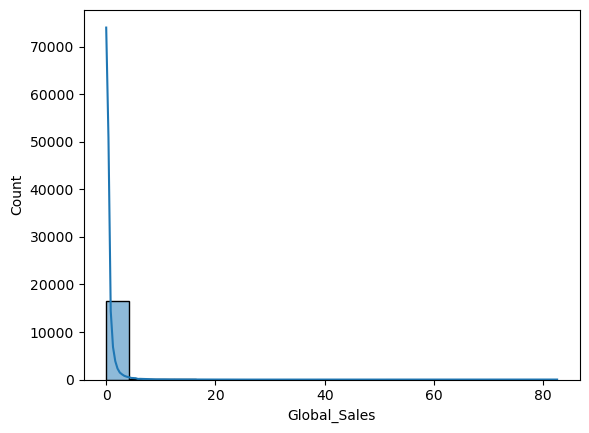

In [904]:
# Lets start by making a 1D histogram of the global sales of all video games in the dataset
sns.histplot(Games_df["Global_Sales"], bins = 20, kde = True)

##### We now want to see how the global sales varies with the numerical variables NA_Sales,EU_Sales,JP_Sales,Other_Sales,
##### Critic_Score,Critic_Count,User_Score,User_Count
#### We can do this by creating scatter plots of global sales against each of these eight variables in turn.

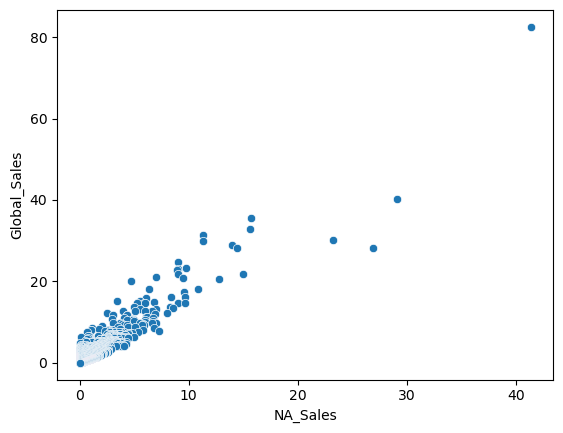

In [72]:
# Create a scatter plot of Global Sales vs NA_Sales
sns.scatterplot(data = Games_df, x = "NA_Sales", y = "Global_Sales")
# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
# Show the figure
plt.show()

In [151]:
max_na_sales = Games_df['NA_Sales'].max()

print (max_na_sales)

41.36


Text(0, 0.5, 'Global_Sales')

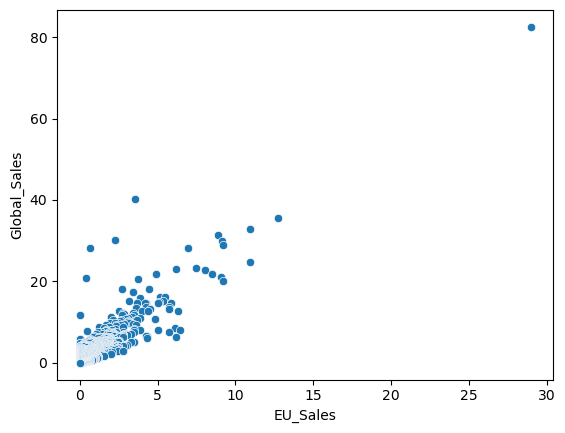

In [74]:
# Create a scatter plot of Global Sales vs EU_Sales
sns.scatterplot(data = Games_df, x = "EU_Sales", y = "Global_Sales")
# Label both axes
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
# Show the figure

In [159]:
max_eu_sales = Games_df['EU_Sales'].max()

print (max_eu_sales)

28.96


Text(0, 0.5, 'Global_Sales')

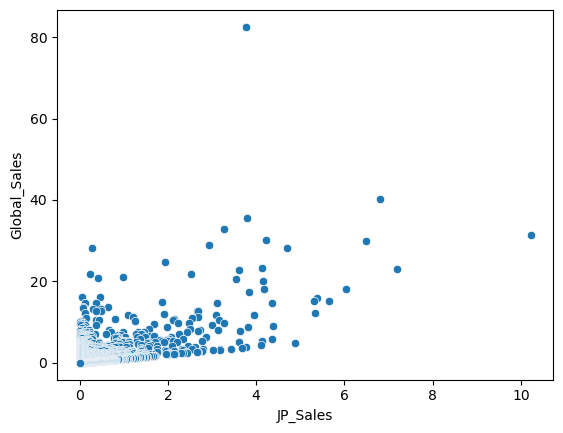

In [76]:
# Create a scatter plot of Global Sales vs JP_Sales
sns.scatterplot(data = Games_df, x = "JP_Sales", y = "Global_Sales")
# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")
# Show the figure

In [165]:
max_jp_sales = Games_df['JP_Sales'].max()

print (max_jp_sales)

10.22


Text(0, 0.5, 'Global_Sales')

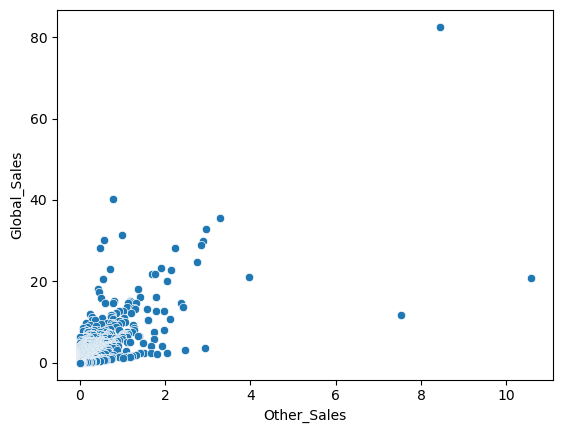

In [78]:
# Create a scatter plot of Global Sales vs Other_Sales
sns.scatterplot(data = Games_df, x = "Other_Sales", y = "Global_Sales")
# Label both axes
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
# Show the figure

In [171]:
max_ot_sales = Games_df['Other_Sales'].max()

print (max_ot_sales)

10.57


Text(0, 0.5, 'Global_Sales')

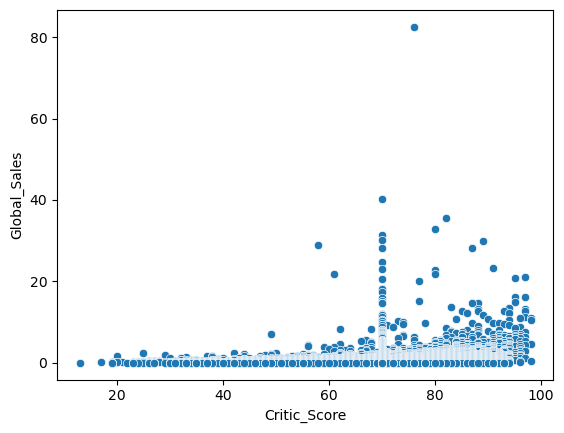

In [80]:
# Create a scatter plot of Global Sales vs Critic_Score
sns.scatterplot(data = Games_df, x = "Critic_Score", y = "Global_Sales")
# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
# Show the figure

In [177]:
max_cr_sales = Games_df['Critic_Score'].max()

print (max_cr_sales)

98.0


Text(0, 0.5, 'Global_Sales')

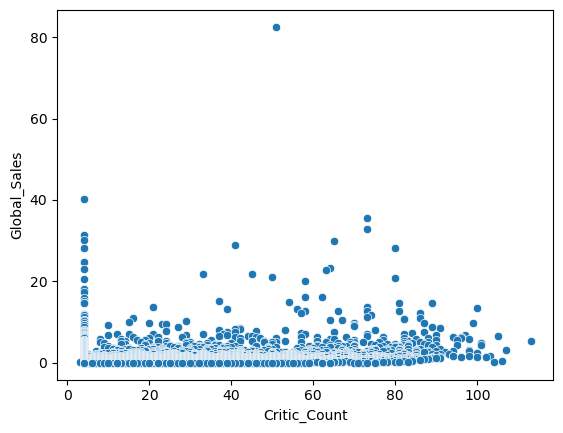

In [82]:
# Create a scatter plot of Global Sales vs Critic_Count
sns.scatterplot(data = Games_df, x = "Critic_Count", y = "Global_Sales")
# Label both axes
plt.xlabel("Critic_Count")
plt.ylabel("Global_Sales")
# Show the figure

In [183]:
max_crc_sales = Games_df['Critic_Count'].max()

print (max_crc_sales)

113.0


Text(0, 0.5, 'Global_Sales')

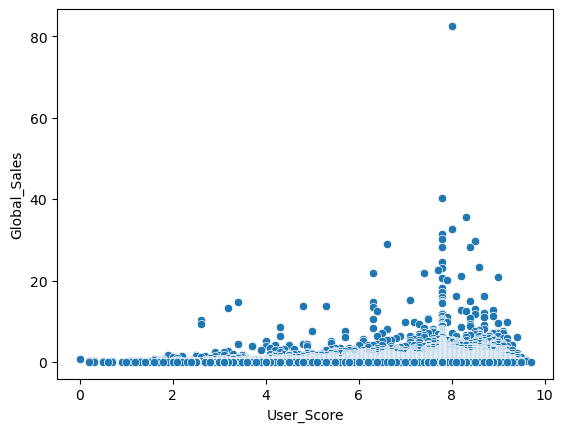

In [86]:
# Create a scatter plot of Global Sales vs User_Score
sns.scatterplot(data = Games_df, x = "User_Score", y = "Global_Sales")
# Label both axes
plt.xlabel("User_Score")
plt.ylabel("Global_Sales")
# Show the figure

In [191]:
max_us_sales = Games_df['User_Score'].max()

print (max_us_sales)

9.7


Text(0, 0.5, 'Global_Sales')

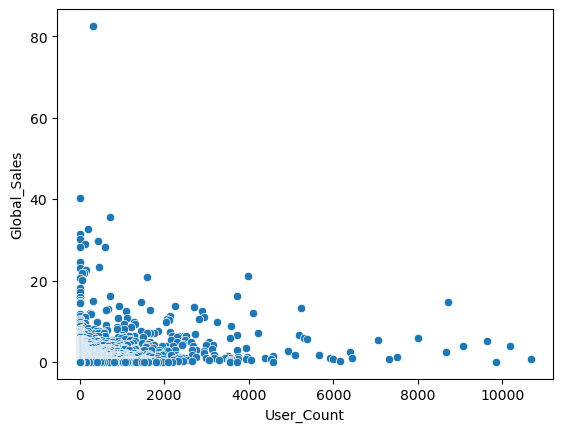

In [88]:
# Create a scatter plot of Global Sales vs User_Count
sns.scatterplot(data = Games_df, x = "User_Count", y = "Global_Sales")
# Label both axes
plt.xlabel("User_Count")
plt.ylabel("Global_Sales")
# Show the figure

In [193]:
max_usc_sales = Games_df['User_Count'].max()

print (max_usc_sales)

10665.0


Text(0, 0.5, 'Global_Sales')

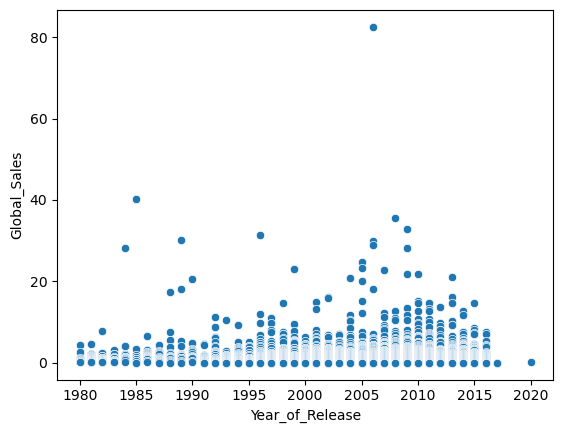

In [336]:
# Create a scatter plot of Global Sales vs Year_of_Release
sns.scatterplot(data = Games_df, x = "Year_of_Release", y = "Global_Sales")
# Label both axes
plt.xlabel("Year_of_Release")
plt.ylabel("Global_Sales")
# Show the figure

In [338]:
max_yr_sales = Games_df['Year_of_Release'].max()

print (max_yr_sales)

2020


### Define which variables we want to use to calculate the correlation coefficients.

<Axes: >

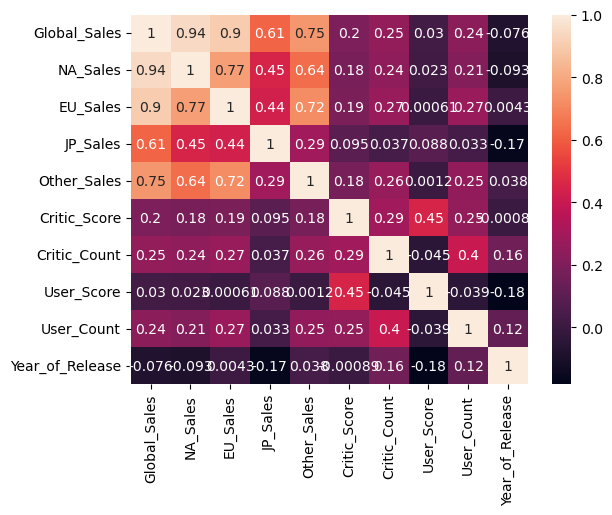

In [342]:
column_list = ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count", 
               "User_Score", "User_Count", "Year_of_Release"]
# Calculate the correlation coefficients, and then plot them using Seaborn's heatmap() function
sns.heatmap(Games_df[column_list].corr(), annot = True)

Scatter plots are useful for comparing two quantitative (i.e. numerical) values. However, some of the columns in the dataset contain categorical data, i.e. qualitative labels rather than numbers. For example, the “Genre” column labels the different genre 
We can create a box plot to compare the distributions of each categorical data.

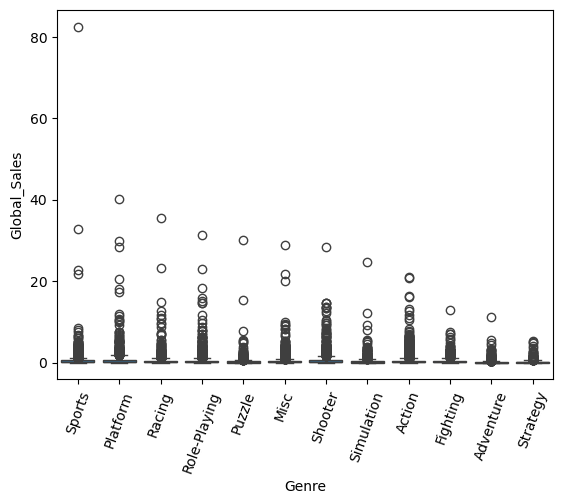

In [112]:
# Use Seaborn's boxplot function to create a box plot of Global Sales versus Genre.
sns.boxplot(data = Games_df, x = "Genre", y = "Global_Sales")
# Label both axes
plt.xlabel("Genre")
plt.ylabel("Global_Sales")
plt.xticks(rotation = 70)
plt.show()

In [135]:
# Use Seaborn's boxplot function to create a box plot of Global Sales versus Genre.
#sns.boxplot(data = Games_df, x = "Publisher", y = "Global_Sales")
# Label both axes
#plt.xlabel("Publisher")
#plt.ylabel("Global_Sales")
#plt.xticks(rotation = 70)
#plt.show()

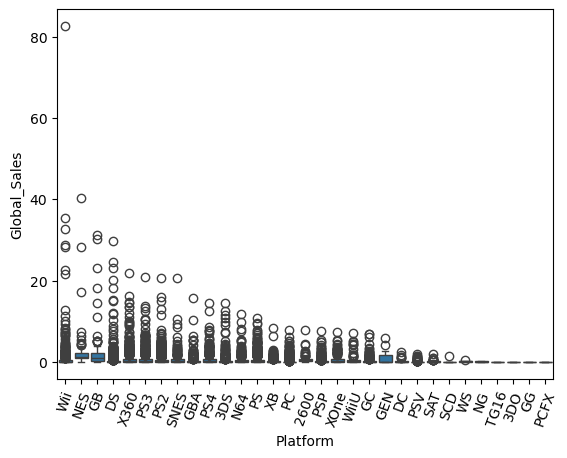

In [129]:
# Use Seaborn's boxplot function to create a box plot of Global Sales versus Genre.
sns.boxplot(data = Games_df, x = "Platform", y = "Global_Sales")
# Label both axes
plt.xlabel("Platform")
plt.ylabel("Global_Sales")
plt.xticks(rotation = 70)
plt.show()

In [133]:
# Use Seaborn's boxplot function to create a box plot of Global Sales versus Genre.
#sns.boxplot(data = Games_df, x = "Developer", y = "Global_Sales")
# Label both axes
#plt.xlabel("Developer")
#plt.ylabel("Global_Sales")
#plt.xticks(rotation = 70)
#plt.show()

## Building our supervised learning model

In [139]:
# using a simple linear regression model to predict Global sales from its NA_Sales.
#We need to extract the feature that we will use for the input variable (the NA_Sales), and the feature that we want 
#to use as the output variable that the model will predict (the Global_Sales)

# Extract the input feature
x = Games_df["NA_Sales"]
# Extract the output feature
y = Games_df["Global_Sales"]
# The sklearn models we will be using expect the input, x, to be in the form of a 2-dimensional array. However, when we extract
# only a single input feature the result is 1-dimensional. We therefore need to convert x to a numpy array and re-shape it so that
# it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Next, we need to split our data into a training set, which we will use to train our model, and a testing set, 
# which we will use to evaluate our final trained model

# We need to import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split
# We can now split the x and y arrays between the train and test sets. We will use 20% of the data for the testing set, and the
# remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# Lets check the size of the training and testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))

There are 13375 data points in the training set.
There are 3344 data points in the testing set.


When we use numerical inputs, we typically need to re-scale them. This will be particularly important later on when we have multiple input
features, as the different variables can cover a very different range of values unless we re-scale them. We will use the
StandardScaler method from sklearn to standardise the input variable (NA_Sales) such that it has a mean of zero and a standard deviation of one.

In [141]:
# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training
# dataset.
scale.fit(x_train)
# Now we apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [143]:
# We can now build our linear regression model and train it on the training dataset.
# We need to import the LinearRegression model from the sklearn library.
from sklearn.linear_model import LinearRegression
# Create an instance of the model.
global_linear = LinearRegression()
# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

LinearRegression()

Once we have fit the model, the fit coefficients (i.e. the gradient and the intercept of the best-fit line) will be stored 
within the global_linear object. Lets print these coefficients so we can see what they look like.

In [145]:
# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  1.2990908882177887
intercept:  0.5255543925233646


in a linear regression model, the gradients tells us the steepness of the line, and the intercept tells us where the
line intersects the vertical axis. However, when interpreting these best-fit parameters! We fit the model to the re-scaled input data, where we standardised the input variable such that it has a mean of zero and a standard deviation of 1. This means that the intercept
corresponds to the predicted global sales with the mean NA_Sales, and the gradient tells us how much does the global sales increase by 
if we increase the NA_Sales by 1 standard deviation.

We now need to evaluate the model, using the testing dataset. As this is a regression problem, we can use metrics such as the mean absolute error, the mean squared error, the root mean squared error, and the Coefficient of Determination (R2)

In [147]:
# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the final, trained model to predict the outputs (global sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# The root mean squared error is just the square root of the mean squared error that we calculated above.
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.2025194943758654
Mean squared error:  0.2874924044610655
Root mean squared error:  0.536183181814821
R2:  0.9303547643023924


The mean absolute error and root mean squared error have the same physical units as the quantity that the model is predicting. The R2 score gives an overall measure of how well the model is performing. An R2 score closer to 1 indicates that the model is doing well. In this model, we find an R2 score of 0.93,which tells us that this model is a good fit to the data. Finally, create a plot that shows our best-fit linear regression line compared to the data

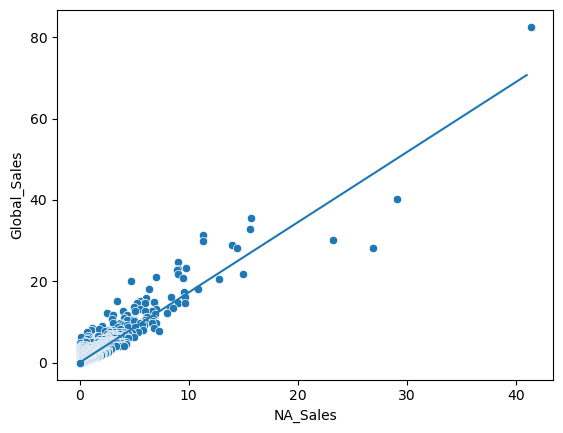

In [155]:
# Create an array of values covering the range of NA_Sales that we found in the dataset

x_fit = np.arange(0, 42, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "NA_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")

# Show the plot
plt.show()

In [157]:
# Fitting a simple linear regression model to the Global Sales versus EU_Sales. 

# Extract the input feature
x = Games_df["EU_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  1.2144711492007805
intercept:  0.5255543925233646
Mean absolute error:  0.24019785072609326
Mean squared error:  0.2994551669140082
Root mean squared error:  0.547224969198234
R2:  0.9274567767461941


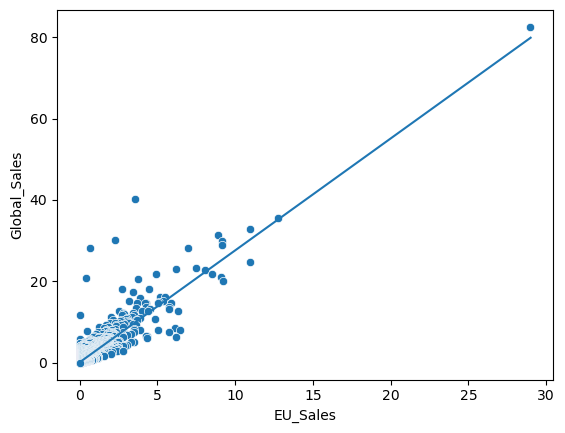

In [161]:
# Create an array of values covering the range of EU_Sales that we found in the dataset, i.e. from 0 to 30
x_fit = np.arange(0, 30, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "EU_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [163]:
# Fitting a simple linear regression model to the Global Sales versus JP_Sales. 

# Extract the input feature
x = Games_df["JP_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.8900093292868508
intercept:  0.5255543925233646
Mean absolute error:  0.5213572321345787
Mean squared error:  2.8220205829543588
Root mean squared error:  1.6798870744649352
R2:  0.31636354354546603


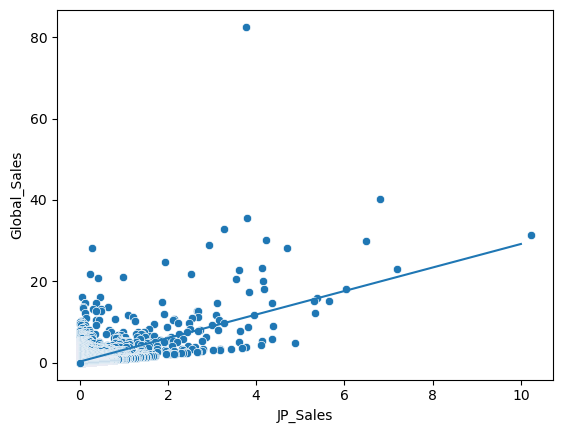

In [167]:
# Create an array of values covering the range of JP_Sales that we found in the dataset
x_fit = np.arange(0, 11, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "JP_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [173]:
# Fitting a simple linear regression model to the Global Sales versus Other_Sales. 

# Extract the input feature
x = Games_df["Other_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.9490807751283011
intercept:  0.5255543925233646
Mean absolute error:  0.34632552621307794
Mean squared error:  1.1700891667101905
Root mean squared error:  1.0817065991802908
R2:  0.7165450824500488


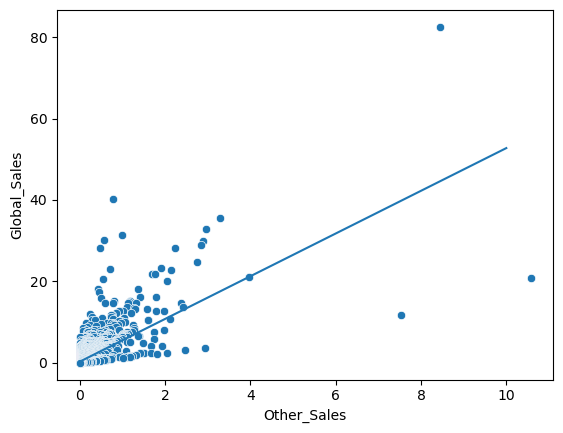

In [175]:
# Create an array of values covering the range of Other_Sales that we found in the dataset
x_fit = np.arange(0, 11, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "Other_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [179]:
# Fitting a simple linear regression model to the Global Sales versus Critic_Score. 

# Extract the input feature
x = Games_df["Critic_Score"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.29961880227827076
intercept:  0.5255543925233647
Mean absolute error:  0.6190344516756676
Mean squared error:  4.030722264632755
Root mean squared error:  2.0076658747492706
R2:  0.023554717286590088


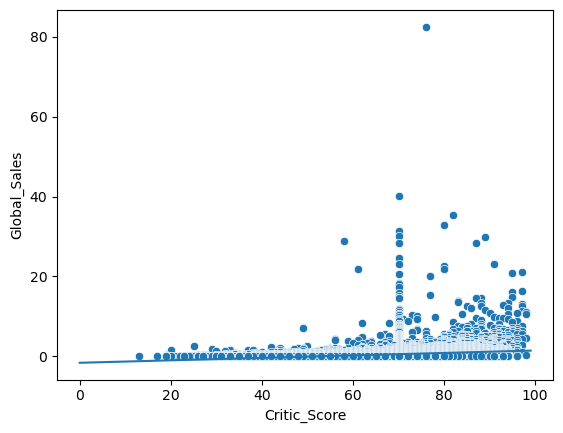

In [181]:
# Create an array of values covering the range of Critic_Score that we found in the dataset
x_fit = np.arange(0, 100, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "Critic_Score", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [185]:
# Fitting a simple linear regression model to the Global Sales versus Critic_Count. 

# Extract the input feature
x = Games_df["Critic_Count"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.37189566658684703
intercept:  0.5255543925233646
Mean absolute error:  0.56521256718809
Mean squared error:  3.917917234878698
Root mean squared error:  1.9793729398167232
R2:  0.05088181450094764


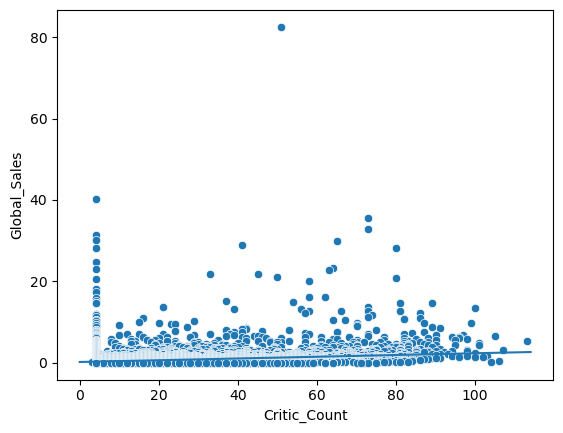

In [187]:
# Create an array of values covering the range of Critic_Count that we found in the dataset
x_fit = np.arange(0, 115, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "Critic_Count", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Critic_Count")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [189]:
# Fitting a simple linear regression model to the Global Sales versus User_Score. 

# Extract the input feature
x = Games_df["User_Score"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.04267764171715736
intercept:  0.5255543925233646
Mean absolute error:  0.6105645117287269
Mean squared error:  4.126102973184882
Root mean squared error:  2.0312811162379476
R2:  0.0004486740484378471


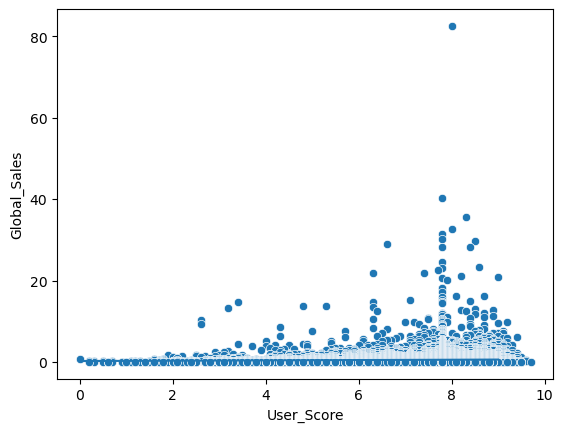

In [195]:
# Create an array of values covering the range of User_Score that we found in the dataset
x_fit = np.arange(0, 10, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "User_Score", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("User_Score")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [197]:
# Fitting a simple linear regression model to the Global Sales versus User_Count. 

# Extract the input feature
x = Games_df["User_Count"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  0.3816302098024477
intercept:  0.5255543925233646
Mean absolute error:  0.5768372905574095
Mean squared error:  4.0472504749028895
Root mean squared error:  2.0117779387653325
R2:  0.019550746809244623


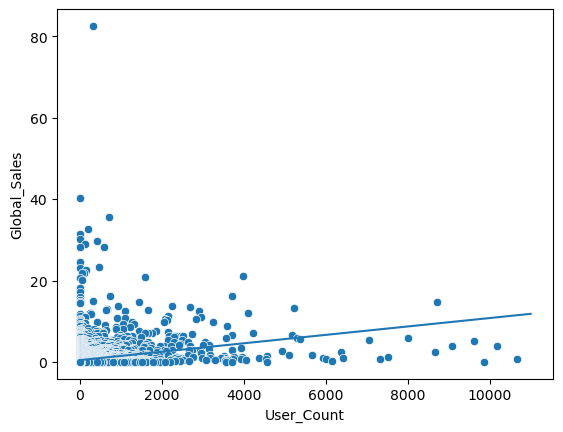

In [199]:
# Create an array of values covering the range of User_Score that we found in the dataset
x_fit = np.arange(0, 11000, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus EU_Sales.
sns.scatterplot(data = Games_df, x = "User_Count", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("User_Count")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [344]:
# using a simple linear regression model to predict Global sales from its NA_Sales.
#We need to extract the feature that we will use for the input variable (the NA_Sales), and the feature that we want 
#to use as the output variable that the model will predict (the Global_Sales)

# Extract the input feature
x = Games_df["Year_of_Release"]
# Extract the output feature
y = Games_df["Global_Sales"]
# The sklearn models we will be using expect the input, x, to be in the form of a 2-dimensional array. However, when we extract
# only a single input feature the result is 1-dimensional. We therefore need to convert x to a numpy array and re-shape it so that
# it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Next, we need to split our data into a training set, which we will use to train our model, and a testing set, 
# which we will use to evaluate our final trained model

# We need to import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split
# We can now split the x and y arrays between the train and test sets. We will use 20% of the data for the testing set, and the
# remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# Lets check the size of the training and testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))

There are 13375 data points in the training set.
There are 3344 data points in the testing set.


In [346]:
# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training
# dataset.
scale.fit(x_train)
# Now we apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [348]:
# We can now build our linear regression model and train it on the training dataset.
# We need to import the LinearRegression model from the sklearn library.
from sklearn.linear_model import LinearRegression
# Create an instance of the model.
global_linear = LinearRegression()
# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

LinearRegression()

In [350]:
# Get the fit coefficients from the best-fit model.
gradient = global_linear.coef_[0]
intercept = global_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  -0.13068362781587017
intercept:  0.525554392523363


In [352]:
# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the final, trained model to predict the outputs (global sales) in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# The root mean squared error is just the square root of the mean squared error that we calculated above.
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.6053108702791786
Mean squared error:  4.129055834613081
Root mean squared error:  2.032007833305049
R2:  -0.00026665869412556553


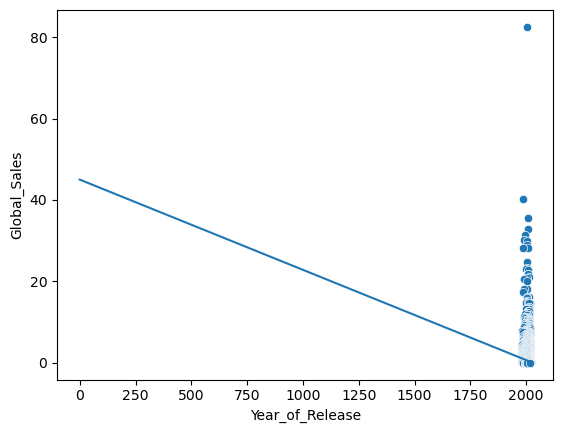

In [354]:
# Create an array of values covering the range of NA_Sales that we found in the dataset

x_fit = np.arange(0, 2020, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Apply the trained model to this scaled input array. This will give us the y-values for the best-fit line.
y_fit = global_linear.predict(x_fit_scaled)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "Year_of_Release", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Year_of_Release")
plt.ylabel("Global_Sales")

# Show the plot
plt.show()

#### polynomial 

Now looking at the relationship between Global_Sales and various numerical variables. We say that a linear regression model does not give a good fit to the data. But can we achieve better performance using a non-linear model, i.e. one that is not just a straight line.

We are going to use a Polynomial Regression model. This is where the output variable, 𝑦, is expressed as a sum of a series of terms that contain increasing powers of the variable, i.e. 𝑥, 𝑥2, 𝑥3 ... x𝑛. Here, 𝑛 is the degree of the polynomial input.

Lets use a polynomial of degree 𝑛 = 2. This means the equation for 𝑦 consists of a constant, a term with 𝑥, and a term with 𝑥2. This is also
known as a quadratic function. We will start by extracting the input and output features, splitting between the training and testing datasets, and applying standardisation to the input feature, as we did earlier.

In [203]:
# Extract the input feature
x = Games_df["NA_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

The next step is to create the polynomial terms from the input variable, i.e. the terms with increasing powers of 𝑥. We can do this using the
PolynomialFeatures class from the sklearn library

In [205]:
# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [207]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [ 1.48732744 -0.01257034]
intercept:  0.5381247290194323


Note that we now have two values in “coefficient”, the first coefficient multiplies the 𝑥 term and the second coefficient multiplies the 𝑥2 term.
We also have the intercept (i.e. the constant term) as before. Now lets calculate the evaluation metrics for this model.

In [209]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.21140854550866825
Mean squared error:  0.6862750564858676
Root mean squared error:  0.828417199535275
R2:  0.8337493884335989


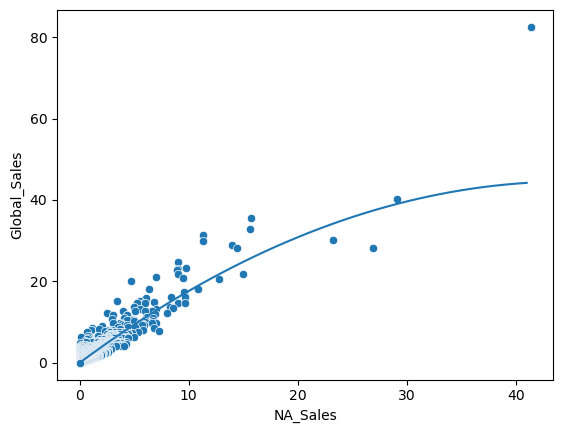

In [211]:
# Creating our plot

# Create an array of values covering the range of NA_Sales that we found in the dataset.
x_fit = np.arange(0, 42, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "NA_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [256]:
# Working on EU_Sales

# Extract the input feature
x = Games_df["EU_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [258]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [ 1.22464110e+00 -9.68342574e-04]
intercept:  0.5265227350976183


In [260]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.24096290527670491
Mean squared error:  0.30870197845572145
Root mean squared error:  0.5556095557635069
R2:  0.925216730194421


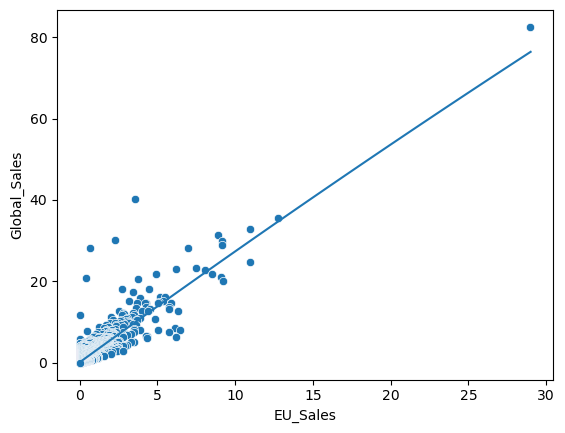

In [262]:
# Creating our plot for EU_Sales

# Create an array of values covering the range of EU_Sales that we found in the dataset.
x_fit = np.arange(0, 30, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "EU_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [264]:
# Working on JP_Sales

# Extract the input feature
x = Games_df["JP_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [266]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [0.70441418 0.01564391]
intercept:  0.509910481894132


In [268]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.5163886275350452
Mean squared error:  2.802701248881694
Root mean squared error:  1.6741270109766744
R2:  0.3210436657126372


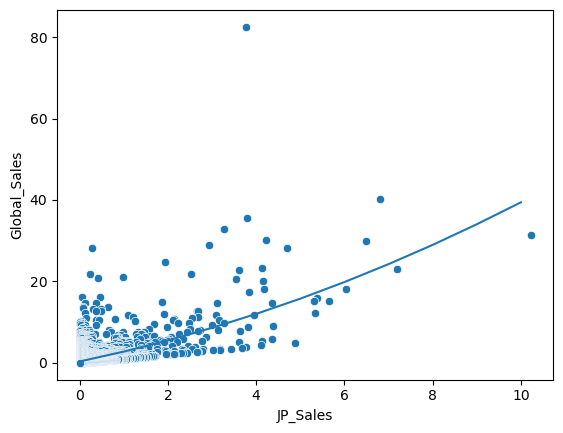

In [271]:
# Creating our plot for JP_Sales

# Create an array of values covering the range of JP_Sales that we found in the dataset.
x_fit = np.arange(0, 11, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "JP_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [273]:
# Working on Other_Sales

# Extract the input feature
x = Games_df["Other_Sales"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [275]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [ 1.49185858 -0.02170053]
intercept:  0.5472549260314239


In [277]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.29033239893829177
Mean squared error:  1.6155771185123928
Root mean squared error:  1.2710535466739366
R2:  0.6086253151022103


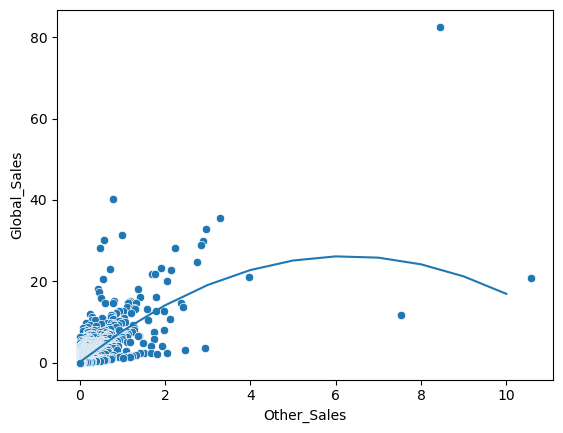

In [280]:
# Creating our plot for Other_Sales

# Create an array of values covering the range of Other_Sales that we found in the dataset.
x_fit = np.arange(0, 11, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "Other_Sales", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [282]:
# Working on Critic_Score

# Extract the input feature
x = Games_df["Critic_Score"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [284]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [0.43832011 0.134396  ]
intercept:  0.39115839723840906


In [286]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.5752318066766272
Mean squared error:  3.9681281293733655
Root mean squared error:  1.9920160966652267
R2:  0.038718190254163676


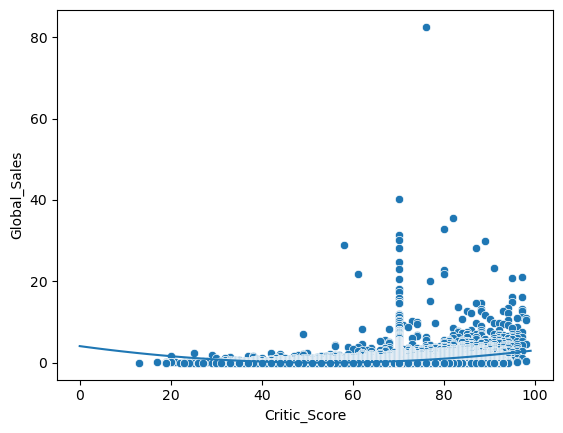

In [289]:
# Creating our plot for Critic_Score

# Create an array of values covering the range of Critic_Score that we found in the dataset.
x_fit = np.arange(0, 100, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "Critic_Score", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [291]:
# Working on Critic_Count

# Extract the input feature
x = Games_df["Critic_Count"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [293]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [0.08366923 0.15075076]
intercept:  0.37480362839124937


In [295]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.5554911988782713
Mean squared error:  3.884127860885464
Root mean squared error:  1.970819083753114
R2:  0.059067313941340904


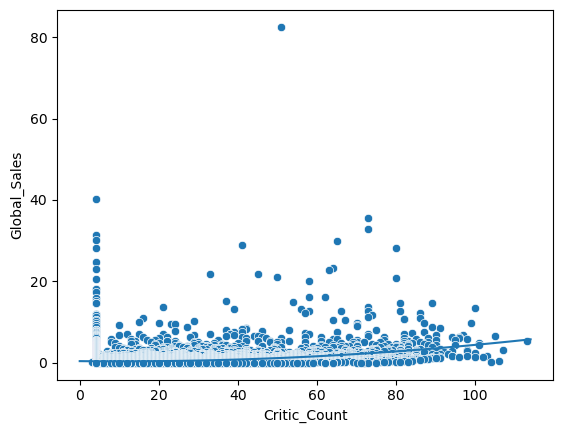

In [298]:
# Creating our plot for Critic_Count

# Create an array of values covering the range of Critic_Count that we found in the dataset.
x_fit = np.arange(0, 115, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "Critic_Count", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Critic_Count")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [300]:
# Working on User_Score

# Extract the input feature
x = Games_df["User_Score"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [302]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [0.13532997 0.03693618]
intercept:  0.48861821390537286


In [304]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.6101302729221266
Mean squared error:  4.123435412862466
Root mean squared error:  2.030624389901408
R2:  0.0010948923989384518


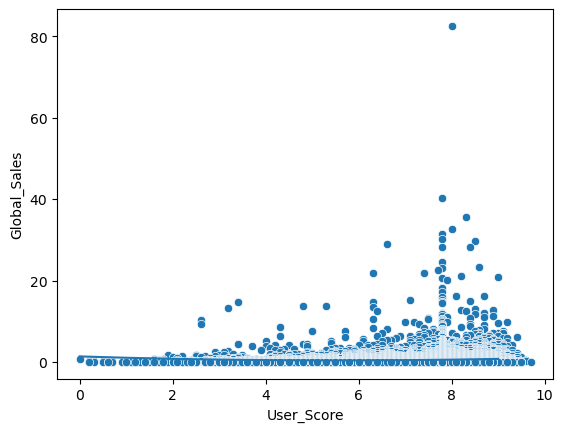

In [307]:
# Creating our plot for User_Score

# Create an array of values covering the range of User_Score that we found in the dataset.
x_fit = np.arange(0, 10, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "User_Score", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("User_Score")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [309]:
# Working on User_Count

# Extract the input feature
x = Games_df["User_Count"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [311]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [ 0.69788608 -0.02406889]
intercept:  0.5496232776099547


In [313]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.5581544124205565
Mean squared error:  3.9453623504514237
Root mean squared error:  1.9862936214093383
R2:  0.04423321609225661


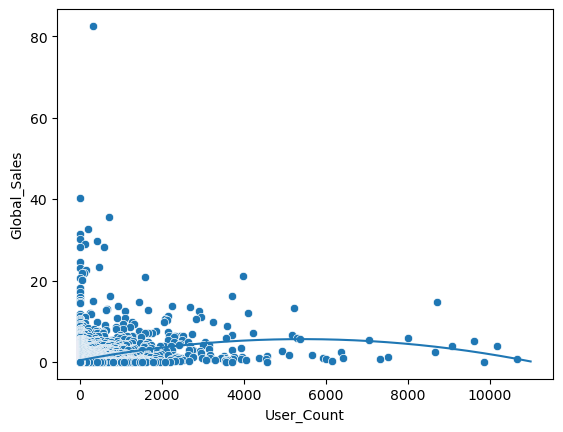

In [316]:
# Creating our plot for User_Count

# Create an array of values covering the range of User_Count that we found in the dataset.
x_fit = np.arange(0, 11000, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "User_Count", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("User_Count")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

In [362]:
# Working on Year_of_Release

# Extract the input feature
x = Games_df["Year_of_Release"]

# Extract the output feature
y = Games_df["Global_Sales"]

# Since we only have a single input feature, we need to re-shape x so that it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the sklearn library.
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures class.We can set the degree of the polynomial using a degree of 2. We set the
# include_bias parameter to false, this means that we don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Now apply this PolynomialFeatures transformation to the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column contains the terms for x and the second column contains the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
global_poly = LinearRegression()
# Fit the model to the training data.
global_poly.fit(x_poly, y_train)

LinearRegression()

In [364]:
# Get the fit coefficients from the best-fit model.
coefficients = global_poly.coef_
intercept = global_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [-0.07729416  0.05136174]
intercept:  0.4741926523869163


In [366]:
# Use the final, trained model to predict the outputs (Global_Sales) in the testing dataset. 
# We first need to create the polynomial features from the scaled inputs features in the testing set, and then
# we can use this with the final trained model to get the predicted Global_Sales.
x_test_poly = poly.fit_transform(x_test_scaled)
global_pred = global_poly.predict(x_test_poly)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.6042919716473051
Mean squared error:  4.132606073206988
Root mean squared error:  2.0328812245694503
R2:  -0.001126706472149186


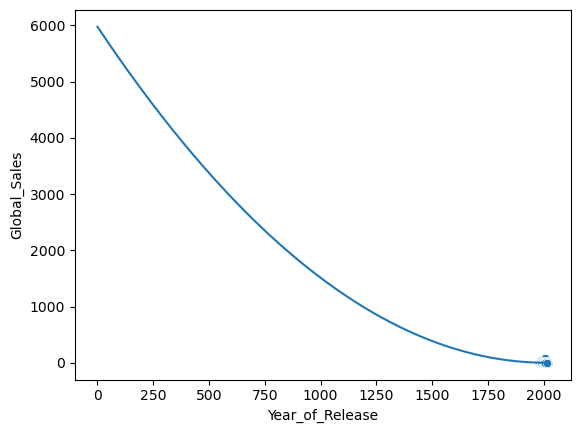

In [368]:
# Creating our plot for Year_of_Release

# Create an array of values covering the range of User_Count that we found in the dataset.
x_fit = np.arange(0, 2020, 1).reshape(-1, 1)

# Apply the standardisation transformation using the same StandardScaler that we used on the training and testing data.
x_fit_scaled = scale.transform(x_fit)

# Create the polyomial features and apply them to the trained model. This will give us the y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = global_poly.predict(x_fit_poly)

# Use seaborn to create a scatter plot of Global_Sales versus NA_Sales.
sns.scatterplot(data = Games_df, x = "Year_of_Release", y = "Global_Sales")

# Plot the best-fit line from the trained model
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("Year_of_Release")
plt.ylabel("Global_Sales")
# Show the plot
plt.show()

## Multiple linear regression model

We will now try a linear regression model that uses nine variables as inputs: the NA_Sales, EU_Sales, JP_Sales,
Other_Sales, Critic_Score, Critic_Count, User_Score and User_Count, Year_of_Release

In [370]:
# Extract the input features. We do not need to re-shape x in this case, because it is already a 2-dimensional array.

feature_names = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
                 "User_Score", "User_Count", "Year_of_Release"]
x = Games_df[feature_names]

# Extract the output feature
y = Games_df["Global_Sales"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = LinearRegression()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
intercept = global_linear.intercept_
coefficients = global_linear.coef_

# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs (life expectancies) for countries in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 7.54510941e-01  4.41866035e-01  3.08061130e-01  1.80869186e-01
 -2.50204812e-05 -5.89756350e-05 -1.23025767e-05 -1.01478688e-04
 -2.09708925e-05]
intercept:  0.5255543925233646
Mean absolute error:  0.002988118856892194
Mean squared error:  2.7840177026138385e-05
Root mean squared error:  0.005276379158678647
R2:  0.9999932556976784


In [372]:
from sklearn.ensemble import RandomForestRegressor

feature_names = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
                 "User_Score", "User_Count", "Year_of_Release"]
x = Games_df[feature_names]

# Extract the output feature
y = Games_df["Global_Sales"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
global_linear = RandomForestRegressor()

# Fit the model to the training data.
global_linear.fit(x_train_scaled, y_train)

# Use the final, trained model to predict the outputs (life expectancies) for countries in the testing dataset.
global_pred = global_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, global_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, global_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, global_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  0.041910641647563134
Mean squared error:  0.7058413179951625
Root mean squared error:  0.8401436293843824
R2:  0.8290094479225083


This model achieves an R2 score of 0.999, which is better than any of the other models that we have tried so far.

We can visualise the predicted global sales from this model, we can plot the predicted global sales against the actual global sales from the testing dataset. 

If the model is performing well, then we would expect the plotted points to lie along the diagonal line corresponding to the predicted and actual global sales being equal.

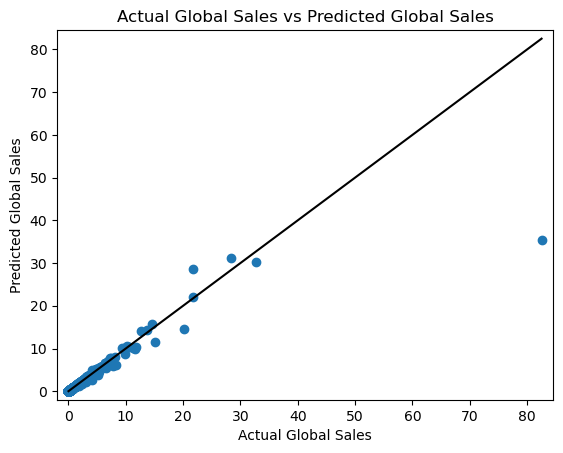

In [382]:
# Create a scatterplot comparing the predicted and actual values of the output variable.
plt.scatter(y_test, global_pred)

# Add a straight diagonal line to the plot. If the model is performing well, the data points should lie along this line, meaning
# that the predicted values are equal to the actual values.
min_val = min(y_test.min(), global_pred.min())
max_val = max(y_test.max(), global_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual Global Sales vs Predicted Global Sales")

# Limit the range of values on both axes
plt.xlim(min_val -2, max_val +2)
plt.ylim(min_val -2, max_val +2)
plt.show()

In [386]:
#Check the values in y_test and global_pred

#print ("y_test values:\n", y_test)
#print ("global_pred values:\n", global_pred)

In the provided code, min_val and max_val are variables used to calculate the minimum and maximum values of the 
y_test (actual values) and global_pred (predicted values). These values are used to ensure the diagonal line spans
the full range of the data.

min_val : represent the smallest value among all the actual (y_test) and predicted (global_pred) values. It ensures that the diagonal line
starts at the minimum value visible in the dataset.

--> y_test.min() ; Finds the smallest value in y_test(actual_values).

--> global_pred.min() ; Finds the smallest value in global_pred (predicted values).

--> min() ; chooses the smaller of the two. 

And vice versa as max_val.

For dynamic plot limits ; Using min_val and max_val ensures that the scatterplot dynamically adjusts its limits to include all data points,
without cropping or leaving unnecessary empty space. "plt.xlim(min_val -2, max_val +2)
                                                      plt.ylim(min_val -2, max_val +2).
This improves readability, making visualization cleaner and easier to interpret.                                                      

### Training a regression model that uses all relevant input variables (both categorical and numerical) to predict the global sales of video games (e.g. a Random Forest Regressor model)

In [403]:
# Checking for values in categorical variables
Games_df['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [405]:
Games_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [407]:
Games_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [409]:
Games_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
     

In [411]:
Games_df['Developer'].unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Atomic Games', 'Interchannel-Holon'],
      dtype=object)

In [470]:
Games_df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [472]:
# From the dataset the categorical variables that could influence the Global_Sales include
# {Genre, Platform, Publisher, Developer, Rating}

# Most regression models can't handle categorical data directly. To address this ; (a) Use One Hot Encoding to 
# transform categorical variables into a binary format. 
# (b) Handle missing or unseen categories by configuring the encoder.

from sklearn.preprocessing import OneHotEncoder

# Extract categorical columns
categorical_columns = ['Genre', 'Platform', 'Publisher', 'Developer', 'Rating', 'Name']

#Instantiate OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore') #handle_unkown = 'ignore'; when using encoders like OneHot, 
                                             # configures it to ignore unseen categories during transformation instead of throwing an error
# sparse_out determines whether the encoded output should be a dense array(False) or a sparse matrix (True)

#Fit and transform categorical variables
categorical_encoded = encoder.fit_transform(Games_df[categorical_columns])

# Check the shape of encoded data
print (f"Shape of encoded categorical columns: {categorical_encoded.shape}")

Shape of encoded categorical columns: (16719, 13890)


#### Combine numerical and categorical variables

In [474]:
# Combine the categorical variables with the numerical columns (NA_Sales, EU_Sales, JP_Sales, Other_Sales,
# User_Score, User_Count, Critic_Score, Critic_Count).

numerical_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
                 "User_Score", "User_Count", "Year_of_Release"]
numerical_dataframe = Games_df[numerical_columns].values

# Combine numerical and encoded categorical columns
combined_x = np.hstack((numerical_dataframe, categorical_encoded))

# Objective variable
y = Games_df ['Global_Sales'].values

print (f"Shaped of combined columns : {combined_x.shape}")

Shaped of combined columns : (16719, 13899)


In [476]:
# Split the dataset into training and test sets to evaluate model performance
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(combined_x, y, test_size = 0.2, random_state = 42)

#print (x_train)
#print (x_test)

In [485]:
# Train Regression model. We'll use Random Forest Regressor because it handles both numerical and categorical columns 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create instance of the Random Forest model
rf_model = RandomForestRegressor( random_state = 42, n_estimators = 100)

#Train model
rf_model.fit(x_train, y_train)

#  Predict on test set
y_pred_rf = rf_model.predict(x_test)

#Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score (y_test, y_pred_rf)

print (mse_rf) 
print (r2_rf)

0.8092067762679421
0.8039690934898613


In [488]:
# Analyze feature importance. Random Forest models provide feature importance scores, which help identify the most
# influential variables

#Get feature importance
feature_importance = rf_model.feature_importances_

# Combine numerical and categorical column names
categorical_column_names = encoder.get_feature_names_out(categorical_columns)
feature_names = numerical_columns + list(categorical_column_names)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by = 'Importance', ascending = False)

# Print top 10 important features
print(importance_df)#.head(10))

                                       Feature  Importance
0                                     NA_Sales    0.845108
1                                     EU_Sales    0.099175
2                                     JP_Sales    0.030701
3                                  Other_Sales    0.013778
8                              Year_of_Release    0.001125
...                                        ...         ...
6903                Name_Jet Li: Rise to Honor    0.000000
6902                          Name_Jet Impulse    0.000000
6901                      Name_Jet Grind Radio    0.000000
6898   Name_Jerry Rice and Nitus' Dog Football    0.000000
13898        Name_¡Shin Chan Flipa en colores!    0.000000

[13899 rows x 2 columns]


### The Visualization

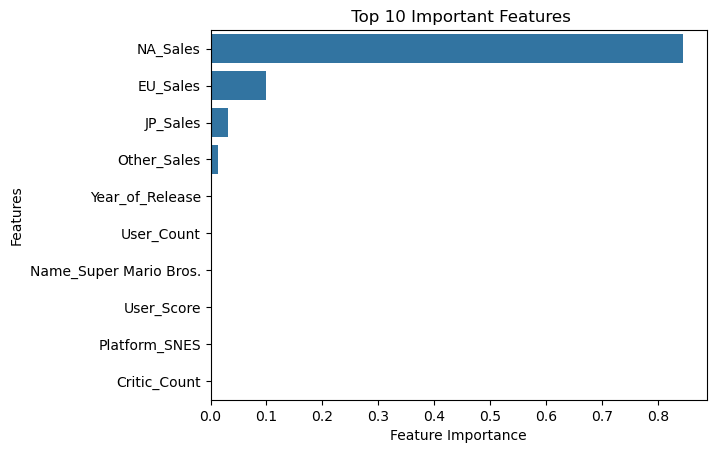

In [490]:
# Plot feature importance 
sns.barplot (data = importance_df.head(10), x = 'Importance', y = 'Feature')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(' Top 10 Important Features')
plt.show()

### Unsupervised learning techniques used to identify clustering patterns in this dataset

##### k-Means clustering algorithm to identify clusters in the video games’ sales data.

In [502]:
# First we extract the features from the dataset that we want to use as the inputs to the clustering algorithm

# Extract the input features
feature_tag = ["NA_Sales", "Global_Sales"]
x = Games_df[feature_tag]

In [504]:
# Once we have extracted the input features, we then need to re-scale them. We will use z-score
# standardisation to re-scale each variable such that they have a mean of zero and a standard deviation of one

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation of each column in x.
scale.fit(x)

# Now we can apply the standard scaler transformation to re-scale each column in x.
x_scaled = scale.transform(x)

In [506]:
# We can now start building the k-Means model, we will use the Elbow Method. To do this, we will try running the k-Means model 
# with different number of clusters, k, from 1 to 10, and record the inertia in each case. This measures how compact the clusters are.

# Import the k-Means model
from sklearn.cluster import KMeans

# Create a list to record the inertia for each value of k.
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

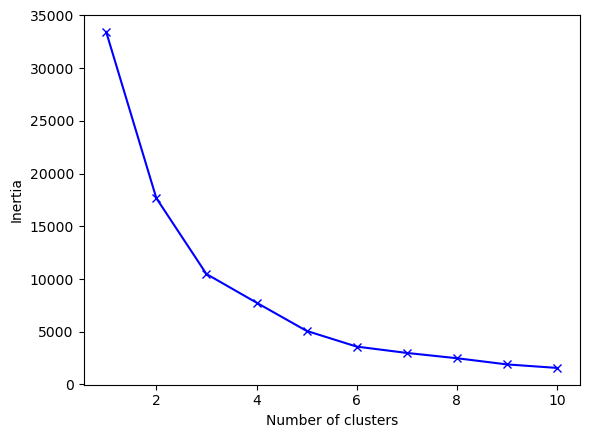

In [508]:
# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')

# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Show the figure
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=3

In [511]:
# We will now fit our final k-Means model, using the optimal number of clusters (k = 3) that we determined above

# Fit the final k-Means model with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

Now that we have the predicted cluster labels from our final model, we can use this to calculate the evaluation metrics that measure how well our clustering algorithm has done at grouping the data into clusters.

In [513]:
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.5394
Silhouette Coefficient: 0.8692


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

From the values that we have found for these two measures, we see that this particular clustering model is OK

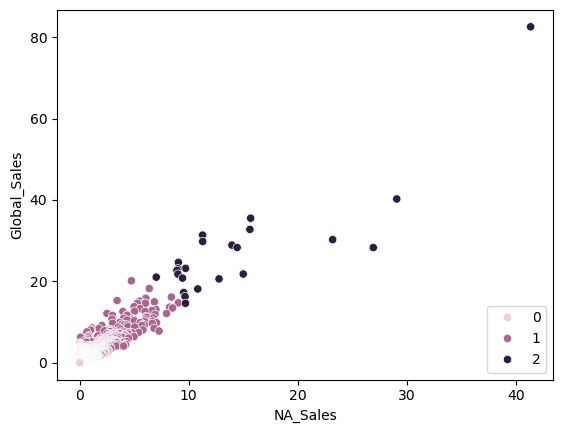

In [517]:
# Now we can visualise these clusters by making a scatter plot of the input features (Global_Sales versus NA_Sales)

# Visualise the clusters in a scatter plot
sns.scatterplot(data = Games_df, x = "NA_Sales", y = "Global_Sales", hue = cluster_labels_pred)

# Add a legend to show the cluster labels
plt.legend(loc = "lower right")

# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
# Show the figure
plt.show()

##### k-Means Clustering - Global_Sales versus EU_Sales

In [521]:
# Extract the input features
feature_tag = ["EU_Sales", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

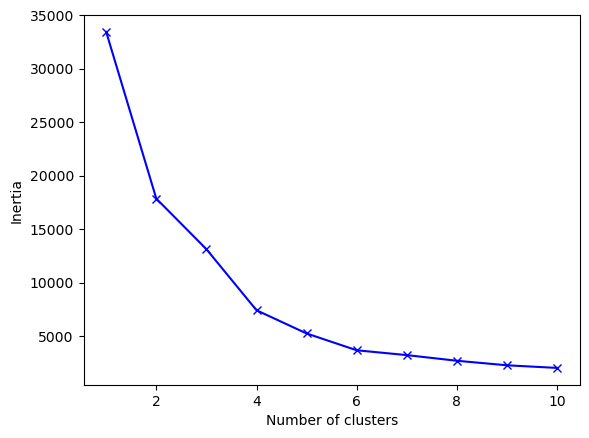

In [523]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=4

In [525]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [527]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.4673
Silhouette Coefficient: 0.8606


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

From the values that we have found for these two measures, we see that this particular clustering model is OK

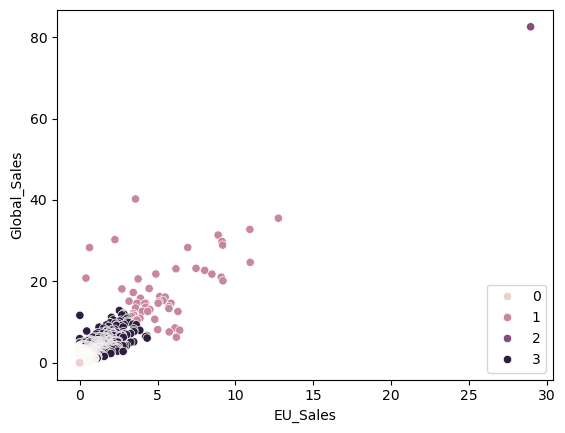

In [533]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "EU_Sales", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "lower right")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus JP_Sales

In [536]:
# Extract the input features
feature_tag = ["JP_Sales", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

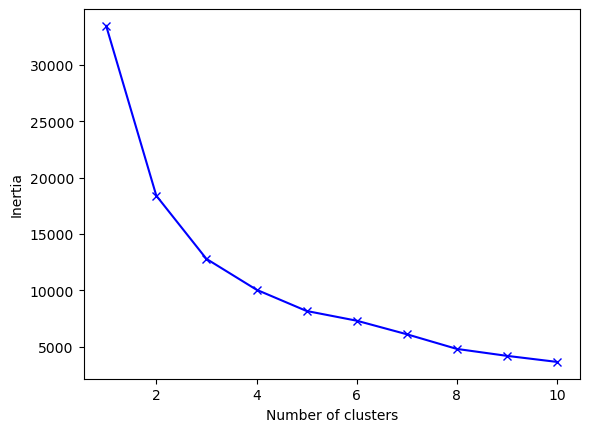

In [538]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=3

In [540]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [542]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.7054
Silhouette Coefficient: 0.8794


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

This model using Global_Sales versus JP_Sales has a high DB index(0.7, almost close to 1) and a high Silhouette coeﬀicient. Therefore, according to both of these measures, this model produces a clustering that is still good, since DB index is still lower than Silhouette coff

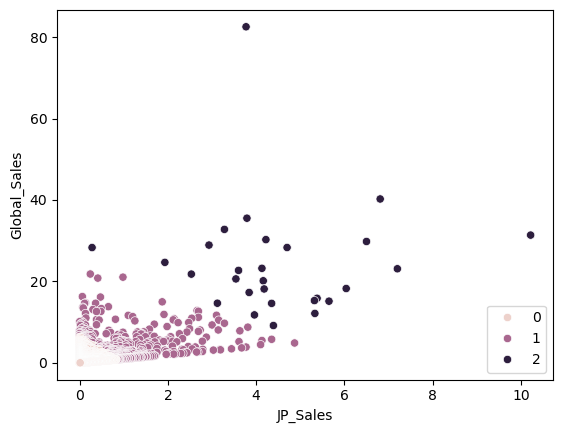

In [544]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "JP_Sales", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "lower right")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus Other_Sales

In [547]:
# Extract the input features
feature_tag = ["Other_Sales", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

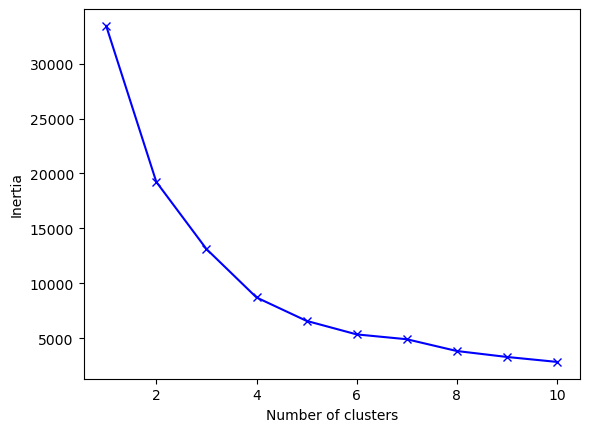

In [549]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=4

In [551]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [553]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6640
Silhouette Coefficient: 0.8484


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

From the values that we have found for these two measures, we see that this particular clustering model is OK

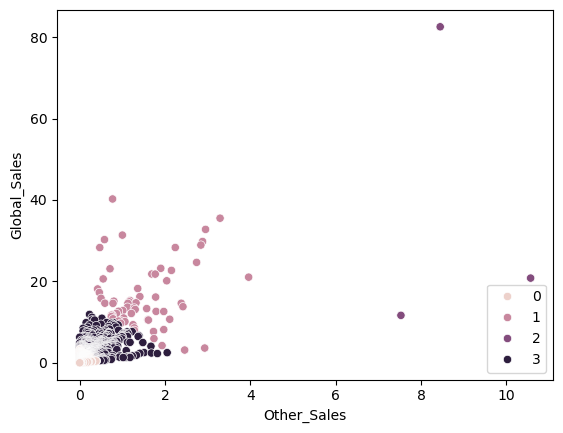

In [555]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "Other_Sales", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "lower right")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus Critic_Score

In [558]:
# Extract the input features
feature_tag = ["Critic_Score", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

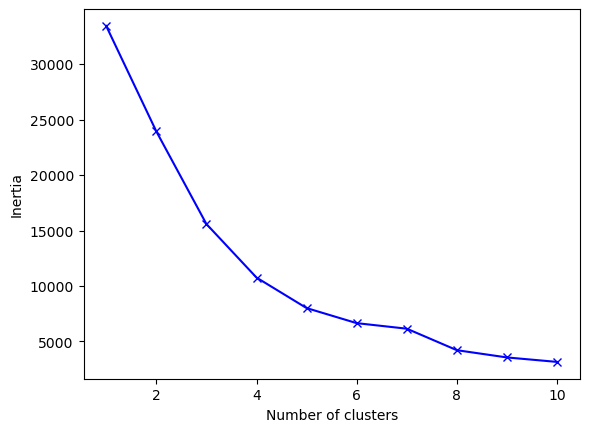

In [560]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=4

In [562]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [564]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6764
Silhouette Coefficient: 0.6273


This model using Global_Sales versus Critic_Score has a higher DB index and a lower Silhouette coeﬀicient. Therefore, according to both of these measures, this model produces a worse clustering

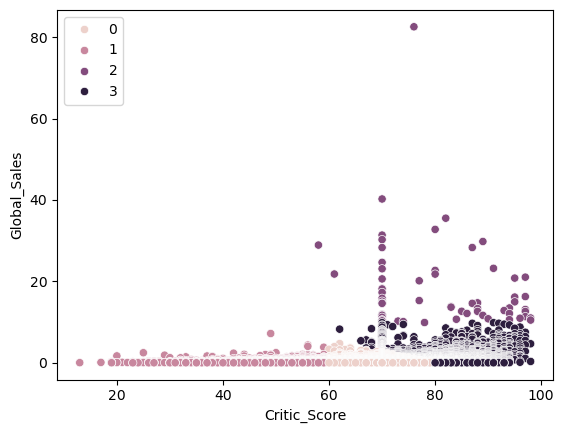

In [568]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "Critic_Score", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "upper left")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus Critic_Count

In [571]:
# Extract the input features
feature_tag = ["Critic_Count", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

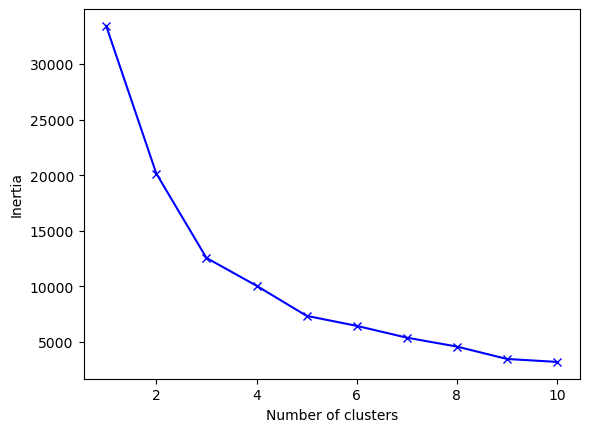

In [573]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=5

In [575]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 5, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [577]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6883
Silhouette Coefficient: 0.6269


This model using Global_Sales versus Critic_Count has a higher DB index and a lower Silhouette coeﬀicient. Therefore, according to both of these measures, this model produces a worse clustering

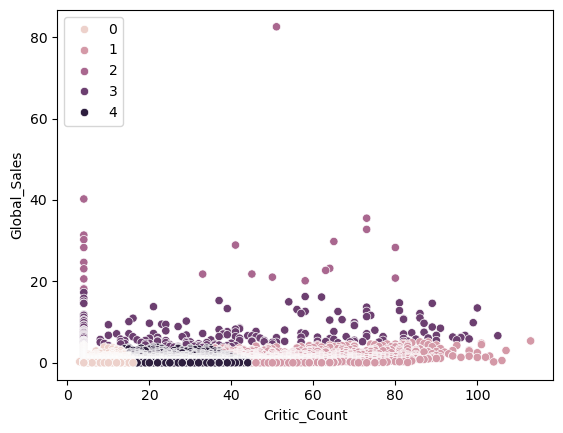

In [579]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "Critic_Count", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("Critic_Count")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "upper left")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus User_Score

In [582]:
# Extract the input features
feature_tag = ["User_Score", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

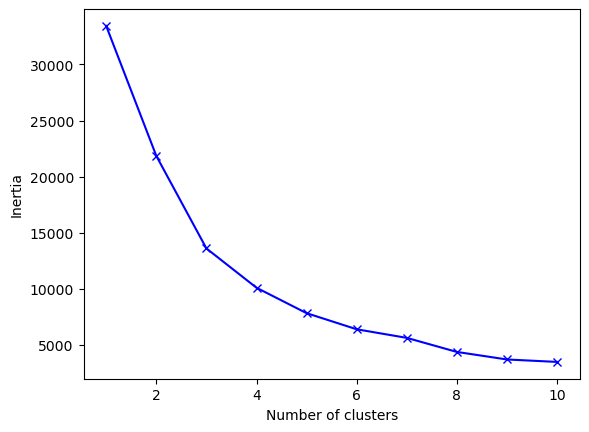

In [584]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=4

In [592]:
# Fit the final k-Means model with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [594]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.5756
Silhouette Coefficient: 0.7247


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

From the values that we have found for these two measures, we see that this particular clustering model is OK

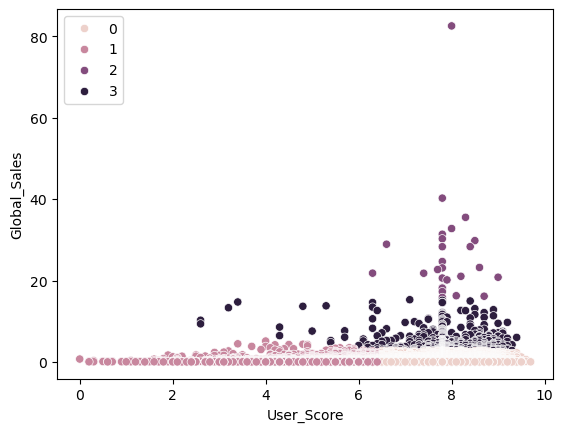

In [596]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "User_Score", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("User_Score")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "upper left")

# Show the plot
plt.show()

##### k-Means Clustering - Global_Sales versus User_Count

In [599]:
# Extract the input features
feature_tag = ["User_Count", "Global_Sales"]

x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create a list to record the inertia
inertia = []

# Define the range of values of k that we will use.
k_range = range(1, 11)

# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

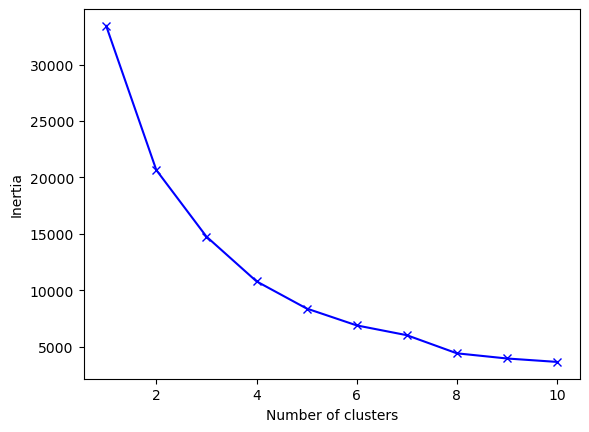

In [601]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

The optimal value of k corresponds to the ”elbow” of this plot, i.e.where it starts to flatten out. From this plot, we see the best value to use is k=5

In [609]:
# Fit the final k-Means model with our chosen k=5
kmeans_final = KMeans(n_clusters = 5, random_state = 42)
kmeans_final.fit(x_scaled)

# Use this fit to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [611]:
# Apply the evaluation metrics. Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6696
Silhouette Coefficient: 0.8432


The ”better” clustering means having a low Davies Bouldin index, but a high (closer to +1) Silhouette Coeﬀicient.

From the values that we have found for these two measures, we see that this particular clustering model is OK

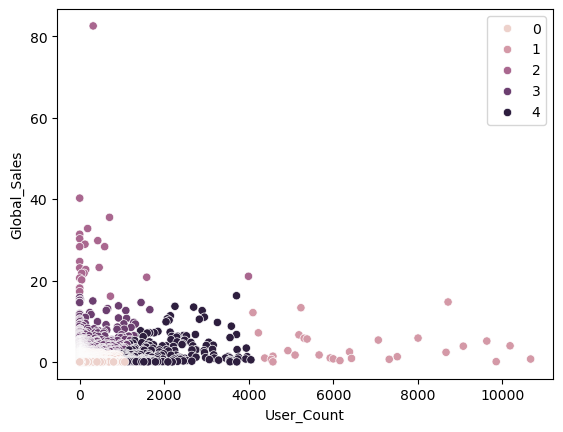

In [615]:
# Visualise the clusters
sns.scatterplot(data = Games_df, x = "User_Count", y = "Global_Sales",hue = cluster_labels_pred)

# Label both axes
plt.xlabel("User_Count")
plt.ylabel("Global_Sales")

# Add a legend to show the cluster labels
plt.legend(loc = "upper right")

# Show the plot
plt.show()

## Using another clustering algorithm 'Hierarchical Clustering' to compare result

In [619]:
# We again start by extracting the input features and applying standardisation to these features.

# Extract the input features
feature_tag = ["NA_Sales", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 3 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [623]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

We can now compute the evaluation metrics, to compare to the results of the clustering from the one used in k-means

In [625]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.2336
Silhouette Score: 0.9743


Recall that earlier using k-means, we achieved a DB Index of 0.5394 and a Silhouette Coeﬀicient of 0.8692
using the k-Means model.

Compared to that, the Hierarchical Clustering model a more lower DB index and a more higher Silhouette coeﬀicient. Based on the Silhouette we might conclude that the Hierarchical Clustering model is better, however the DB Index suggests that the k-Means model is better.

For this comparison, given that the difference in the DB Index is relatively small, and Silhouette Score is way higher, I would therefore
conclude that the Hierarchical model gives a better clustering result overall.

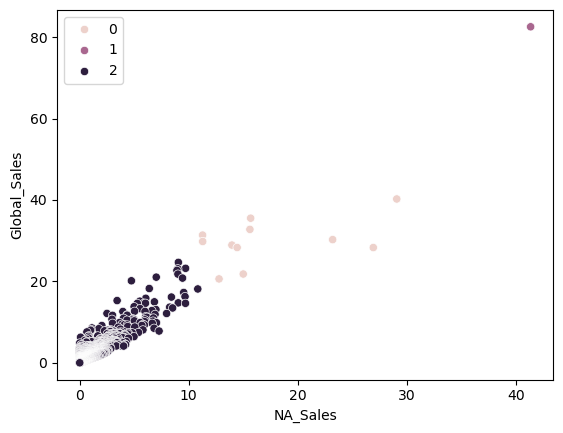

In [627]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "NA_Sales", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus EU_Sales

In [691]:
# Extract the input features
feature_tag = ["EU_Sales", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 4 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [693]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 4 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [695]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.3562
Silhouette Score: 0.9471


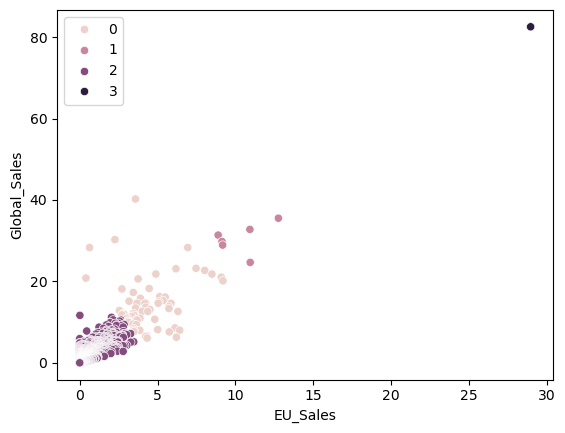

In [697]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "EU_Sales", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus JP_Sales

In [637]:
# Extract the input features
feature_tag = ["JP_Sales", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 3 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [639]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [641]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.1956
Silhouette Score: 0.9743


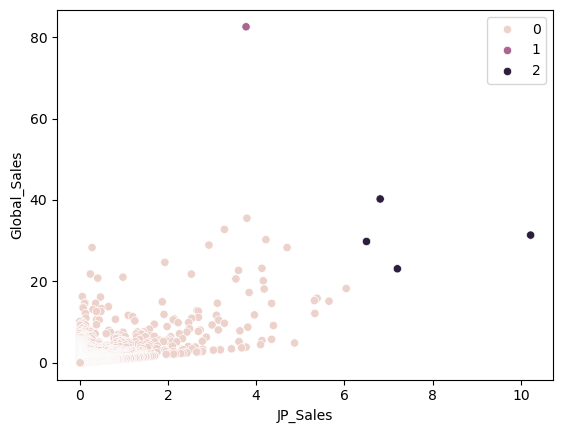

In [643]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "JP_Sales", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus Other_Sales

In [699]:
# Extract the input features
feature_tag = ["Other_Sales", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 4 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [701]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 4 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [703]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.3489
Silhouette Score: 0.9577


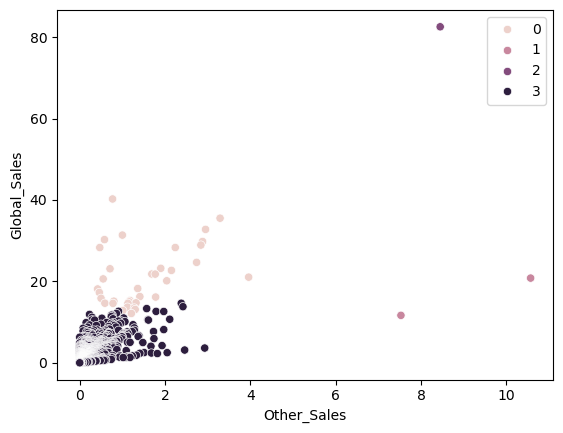

In [705]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "Other_Sales", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus Critic_Score

In [707]:
# Extract the input features
feature_tag = ["Critic_Score", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 4 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [709]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 4 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [711]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.3321
Silhouette Score: 0.8847


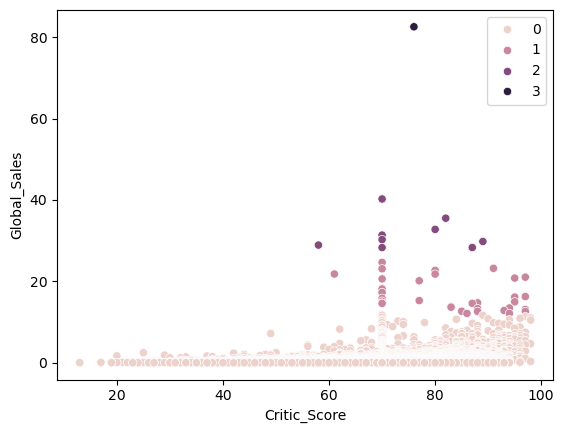

In [713]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "Critic_Score", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus Critic_Count

In [665]:
# Extract the input features
feature_tag = ["Critic_Count", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 5 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [667]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 5 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [669]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.5228
Silhouette Score: 0.8468


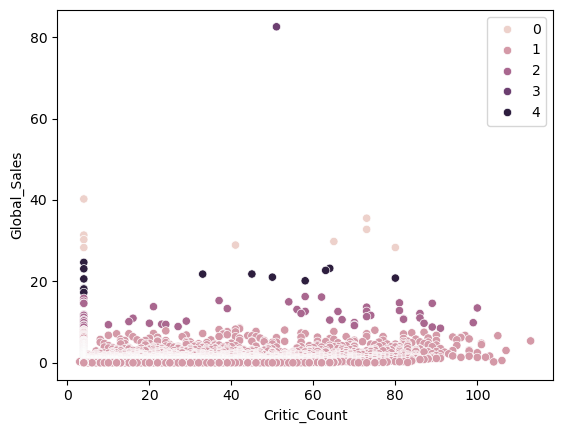

In [671]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "Critic_Count", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("Critic_Count")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus User_Score

In [674]:
# Extract the input features
feature_tag = ["User_Score", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 4 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [676]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 4 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [678]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.3551
Silhouette Score: 0.8310


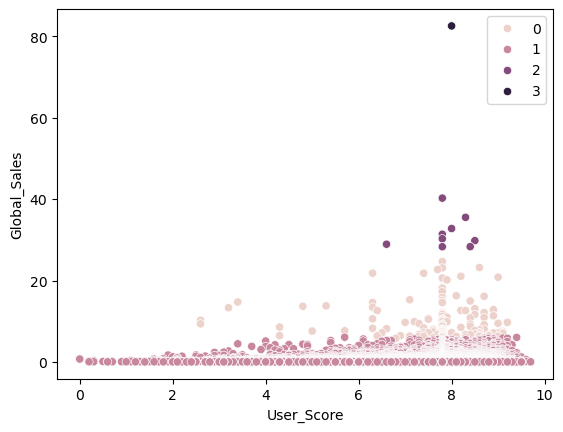

In [680]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "User_Score", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("User_Score")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

##### Hierarchical Clustering - Global_Sales versus User_Count

In [683]:
# Extract the input features
feature_tag = ["User_Count", "Global_Sales"]
x = Games_df[feature_tag]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

We will just consider this model with 5 clusters, so we can easily compare to our earlier results.

We also need to choose what type of linkage to use in this model. We are going to consider complete linkage for this course

In [685]:
# Import the AgglomerativeClustering model from the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering class, with 5 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [687]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.4521
Silhouette Score: 0.9444


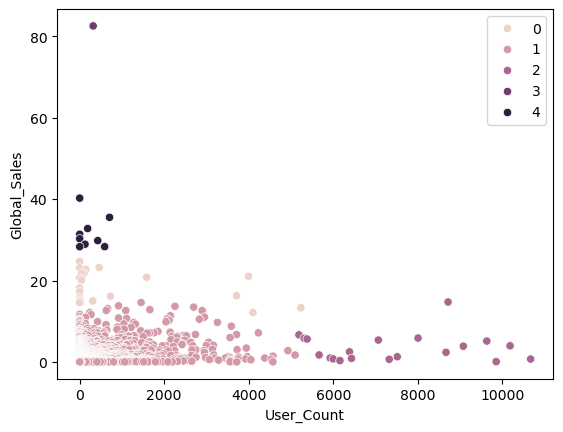

In [689]:
# Visualise the clusters in a scatter plot of Global_Sales versus NA_Sales
sns.scatterplot(data = Games_df, x = "User_Count", y = "Global_Sales", hue = agg_labels_pred)

# Label both axes
plt.xlabel("User_Count")
plt.ylabel("Global_Sales")

# Show the figure
plt.show()

### Developed Artificial Neural Network (ANN) model that predict the global sales of video games 

We will start by extracting the features from the dataset that we are going to use as the inputs to our model, and the feature that we want to use as the output that the model is going to predict. For this course, we will use the NA_Sales, EU_Sales, JP_Sales, Other_Sales, Critic_Score, Critic_Count, User_Score, User_Count as the inputs. The output will be the Global_sales.

In [720]:
# Extract the input features, which we will call x.
feature_title = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]
x = Games_df[feature_title]

# Extract the output features, which we will call y.
y = Games_df["Global_Sales"]

Next, we need to divide the input and output data into training and testing sets. We can again use the train_test_split function from sklearn. 

In [722]:
# Split between train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

We will apply Min-Max scaling, which will re-scale each variable such that they have values between 0 and 1.

In [724]:
# Import the MinMaxScaler class from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scale = MinMaxScaler()

# Fit the min-max scaler to the input data in x_train. This will find the minimum and maximum value of each column in x_train. 
# we take note that we are using the training dataset here.
scale.fit(x_train)

MinMaxScaler()

In [726]:
# Now we need to apply this min-max scaler transformation. Note that we apply it to  both the training and the testing datasets,
# but it is the same transformation that we apply to both. This is important, because we need to re-scale both the training and
# the testing set in the same way.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [728]:
x_train_scaled

array([[0.00447043, 0.        , 0.        , ..., 0.00909091, 0.80412371,
        0.        ],
       [0.        , 0.00626959, 0.00782779, ..., 0.00909091, 0.80412371,
        0.        ],
       [0.        , 0.        , 0.02544031, ..., 0.00909091, 0.80412371,
        0.        ],
       ...,
       [0.00859697, 0.0039185 , 0.        , ..., 0.00909091, 0.69072165,
        0.0008442 ],
       [0.02716644, 0.06896552, 0.        , ..., 0.39090909, 0.78350515,
        0.00731639],
       [0.        , 0.        , 0.00195695, ..., 0.00909091, 0.80412371,
        0.        ]])

####  Build the model (constructor stage)

In [747]:
# Import the necessary libraries to build a neural network. We will build our model using the sequential model class.
from keras.models import Sequential

# We also need to import the Keras layers Dense (which will allow us to define fully-connected layers in the network)
# Dense indicates fully-connected networks and Dropout (which will allow us to set a drop out rate on layers in the network).
from keras.layers import Dense, Dropout, Input

Next, we build the neural network model. An input layer, 2 hidden layers, a dropout layer and an output layer

In [749]:
# Start by creating an instance of the Sequential class. This will be our model.
model = Sequential()

In [751]:
# We will use the model's add() function to add each layer of the network in turn. The inputs to the model have 8 units or shapes
# (i.e. input_dim = 8), corresponding to the 8 features (or variables) that we are using as inputs to the model.
# these 8 input features are NA_Sales, EU_Sales, JP_Sales, Other_Sales, Critic_Score, Critic_Count, User_Score and User_Count.

model.add(Input(shape=(8,)))

# this will be followed by the first hidden layer of the network, which will be a Dense (i.e. fully connected) 
# layer with 64 neurons (i.e. units) We also need to specify the activation function. We will use the ReLU function for this

model.add(Dense(units = 64, activation = "relu"))

# model.add(Dense(units = 64, input_dim = (8), activation = "relu"))
# Next, we want to apply a 20% dropout rate to this hidden layer, to help prevent overfitting. We can do this by adding a Dropout layer here.

model.add(Dropout(0.2))

# Now add a second hidden layer with 64 units and the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))

# Finally, we need to create the output layer. This will have 1 unit because we are predicting
# one value (the Global_Sales) as the output.
# Also, we will use the linear activation function, because this is a regression problem, predicting a continuous output variable.

model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model (compilation stage)

Next, we need to compile the model (the compilation stage). This will allow us to set various options and hyperparameters, such as the
optimiser, the loss funciton, and the metrics. We will use the Adam optimiser, and we will use the mean squared error for the loss and the metrics.

In [754]:
# The following command will compile the model, using the Adam optimizer with its default parameter
# choices. We also specify the loss function and the metrics. It is used as a loss function during model training

from keras.losses import mean_squared_error

# It is used to evaluate the model's performance during training and/or validation

from keras.metrics import mean_squared_error

# adopting stochastic gradient descent, Adam to optimise weights from tensorflow.keras.optimizers import SGD 
# importing the adam from the tensorflow from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [756]:
print(model)
print(x_train_scaled)
print(y_train)

<Sequential name=sequential, built=True>
[[0.00447043 0.         0.         ... 0.00909091 0.80412371 0.        ]
 [0.         0.00626959 0.00782779 ... 0.00909091 0.80412371 0.        ]
 [0.         0.         0.02544031 ... 0.00909091 0.80412371 0.        ]
 ...
 [0.00859697 0.0039185  0.         ... 0.00909091 0.69072165 0.0008442 ]
 [0.02716644 0.06896552 0.         ... 0.39090909 0.78350515 0.00731639]
 [0.         0.         0.00195695 ... 0.00909091 0.80412371 0.        ]]
9162     0.14
8300     0.17
6518     0.26
3307     0.61
12933    0.05
         ... 
11284    0.08
11964    0.07
5390     0.34
860      1.98
15795    0.02
Name: Global_Sales, Length: 13375, dtype: float64


####  Train the model (Training stage)

We are now ready to train our neural network model, using the scaled input data from x_train_scaled and the output data from y_train . We will train the model for 200 epochs, but we will also impose an early stopping criterion with a patience of 20. This means that the training will be stopped if the validation loss has not improved over any 20 consecutive epochs. This helps to prevent over-fitting

In [762]:
# Import the EarlyStopping class from Keras
from keras.callbacks import EarlyStopping

# Define the early stopping criterion. We will monitor the Validation Loss, and we will use a patience of 20.

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model. Note that we record the return value from the fit() command in the variable called history.
# this will allow us to plot how the losses varied with epoch while the model was being trained.

# Fit the model with early stopping
history = model.fit(x=x_train_scaled, y=y_train,batch_size=None, epochs=200, 
                    verbose="auto", validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 1.3058 - mean_squared_error: 1.3058 - val_loss: 0.7870 - val_mean_squared_error: 0.7870
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.4546 - mean_squared_error: 0.4546 - val_loss: 0.2931 - val_mean_squared_error: 0.2931
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.1827 - val_mean_squared_error: 0.1827
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.1652 - val_mean_squared_error: 0.1652
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0940 - val_mean_squared_error: 0.0940
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0682 - mean_squared_error: 0.

####  Make predictions (Prediction stage)

Now that we have trained our neural network model, we need to visualise the results. Lets start by using the trained model to predict the Global sales of the video games in the testing set. We can then plot the predicted Global Sales to the actual Global Sales for these video games.

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


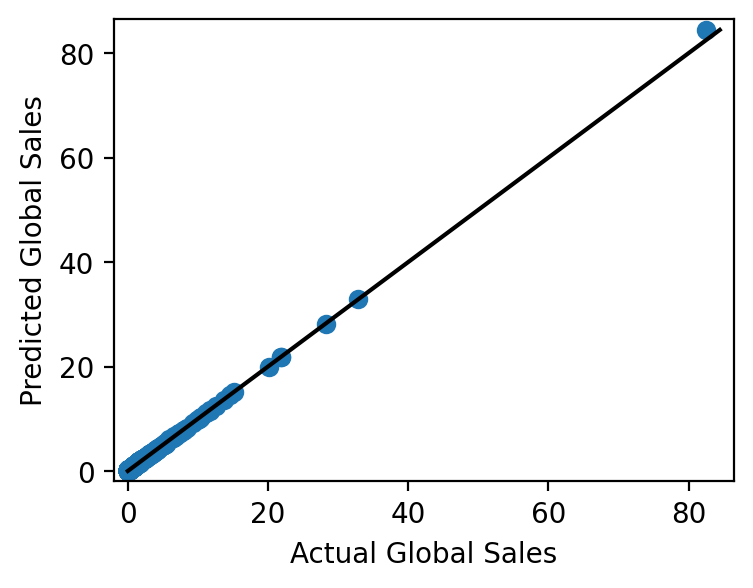

In [797]:
# Predict the model outputs for the tresting set.
y_pred = model.predict(x_test_scaled)

# Now use matplotlib to plot the predicted vs actual global sales.
# Start by creating a figure
plt.figure(figsize = (4, 3), dpi = 200)

# Create a scatterplot comparing the predicted and actual values of the output variable.
plt.scatter(y_test, y_pred)

# Add a straight diagonal line to the plot. If the model is performing well, the data
# points should lie along this line, meaning that the predicted values are equal to the
# actual values.
minimum_val = min(y_test.min(), y_pred.min())
maximum_val = max(y_test.max(), y_pred.max())
plt.plot([minimum_val, maximum_val], [minimum_val, maximum_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

# Adjust dynamic Limit of range values on both axes
plt.xlim(minimum_val -2, maximum_val +2)
plt.ylim(minimum_val -2, maximum_val +2)

# Show the plot.
plt.show()

Next, lets plot how the loss function varies with epoch, for both the training and the validation sets, as
we train the model

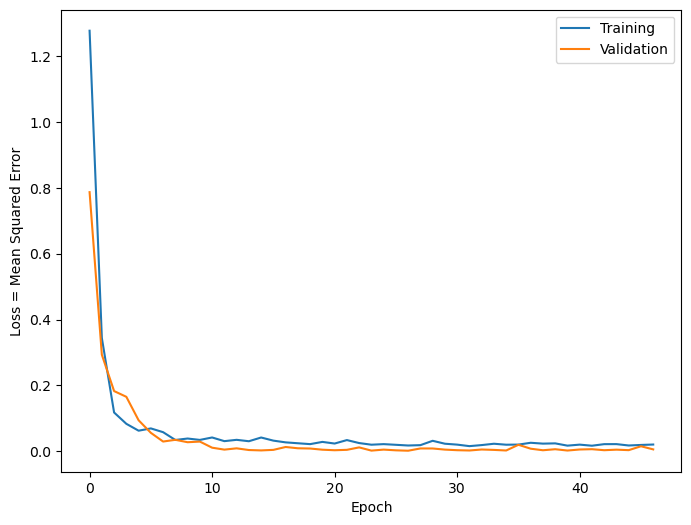

In [801]:
# We start by creating a pandas dataframe containing the history of the fitting.

history_df = pd.DataFrame(history.history)

# Next, use matplotlib to create a figure.
plt.figure(figsize = (8, 6), dpi = 100)

# Plot the history of the training and validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

We see that the mean squared error loss for training started decreasing from 1.3 rapidly and the validation sets decrease from 0.8 rapidly in the first 5 epochs, and then continue
to decrease gradually after that. There is no strong evidence of over-fitting here, as we would see this if the validation loss started increasing at
later epochs while the training loss continued to decrease, but this does not happen here.

We also see that the training was stopped after 47 epochs. This means the early stopping criterion was triggered, which prevented it from
continuing with the full 200 epochs.

####  Hyperparameter tuning

(tuning the number of network layers)
We will start by tuning the number of layers in the network. Lets build a new neural network model that adds a third hidden layer.

Note: It is important that we create a new model (i.e. a new instance of the Sequential class)

In [804]:
# Create an instance of the Sequential class. This will be our model.
model = Sequential()

# Add the first hidden layer, with input_dim = 8, 64 units, and the ReLU activation function.

# Construct a new model

# Add the Input layer with shape=(8,). This defines the input shape for the model.
model.add(Input(shape=(8,)))
model.add(Dense(units=64, activation="relu"))
#model.add(Dense(units=64, input_dim=(8), activation="relu"))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# Third hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit because we are predicting one value (the Global_Sales). Also, we will use the linear
# activation function, because this is a regression problem, predicting a continuous output variable.
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [806]:
# Compile the model using the Adam optimizer.
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

# Define the early stopping criterion, with a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

In [808]:
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 1.6063 - mean_squared_error: 1.6063 - val_loss: 0.3113 - val_mean_squared_error: 0.3113
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.1947 - mean_squared_error: 0.1947 - val_loss: 0.1916 - val_mean_squared_error: 0.1916
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.1488 - mean_squared_error: 0.1488 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.0433 - mean_squared_error: 0.

Now plot the results of the model. We will again look at a comparison between the predicted and actual Global Sales in the testing set,
and the history of the training and validation losses versus epoch.

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


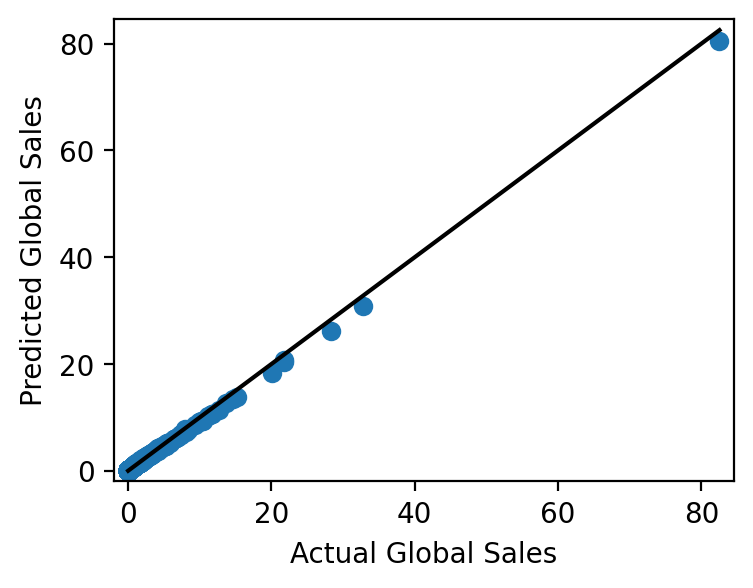

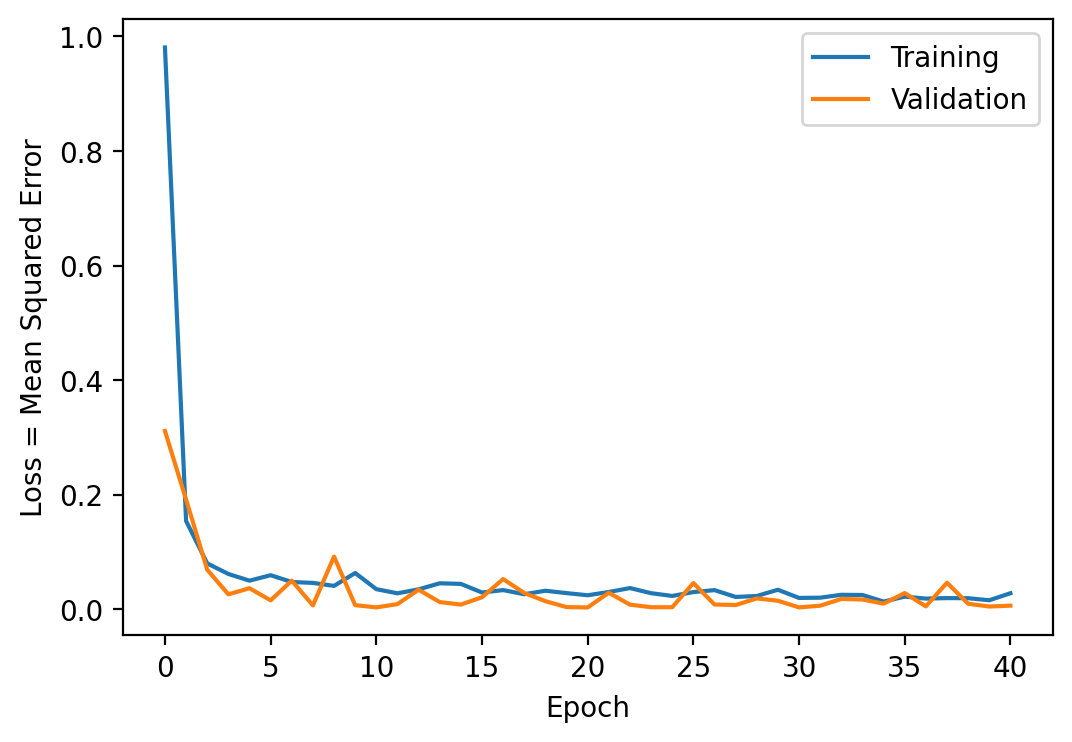

In [812]:
# Predict the model outputs for the testing set
y_pred = model.predict(x_test_scaled)

# Plot the predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 200)

plt.scatter(y_test, y_pred)

# Add a diagonal line showing the one-to-one relation.
minimum_val = min(y_test.min(), y_pred.min())
maximum_val = max(y_test.max(), y_pred.max())
plt.plot([minimum_val, maximum_val], [minimum_val, maximum_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

# Adjust dynamic Limit of range values on both axes
plt.xlim(minimum_val -2, maximum_val +2)
plt.ylim(minimum_val -2, maximum_val +2)

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)
plt.figure(figsize = (6, 4), dpi = 200)

# Plot the training and validation loss versus epoch
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

We see that the mean squared error loss in both the training and the validation sets decrease rapidly in the first 4 epochs, and then continue
to decrease gradually after that. There is evidence of over-fitting here, as we can see the validation loss started increasing at
later epochs while the training loss continued to decrease.

We will therefore continue with this architecture, using two hidden layers.

We will now try varying the learning rate of the Adam optimizer. The learning rate controls how rapidly the model parameters are updated with each epoch. The default learning rate is 0.001 in the Adam optimiser, so we will try values of 0.01 and 0.0001

In [836]:
# If we want to change the value of the learning rate, we will need to use the Adam class from Keras.
from keras.optimizers import Adam

# Create an instance of the Adam class. We will set the learning_rate to 0.01 here.
adam_optimizer = Adam(learning_rate = 0.01)

# Create an instance of the Sequential class. This will be our model.
model = Sequential()

# Add the first hidden layer, with input_dim = 8, 64 units, and the ReLU activation function.
model.add(Input(shape=(8,)))
model.add(Dense(units=64, activation="relu"))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit because we are predicting one value (the global sales). Also, we will use the linear
# activation function, because this is a regression problem, predicting a continuous output variable.
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model, but we now use the adam_optimizer that we created above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Define the early stopping criterion, with a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.4044 - mean_squared_error: 0.4044 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.1165 - val_mean_squared_error: 0.1165
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.0762 - val_mean_squared_error: 0.0762
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.1514 - mean_squared_error: 0.

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


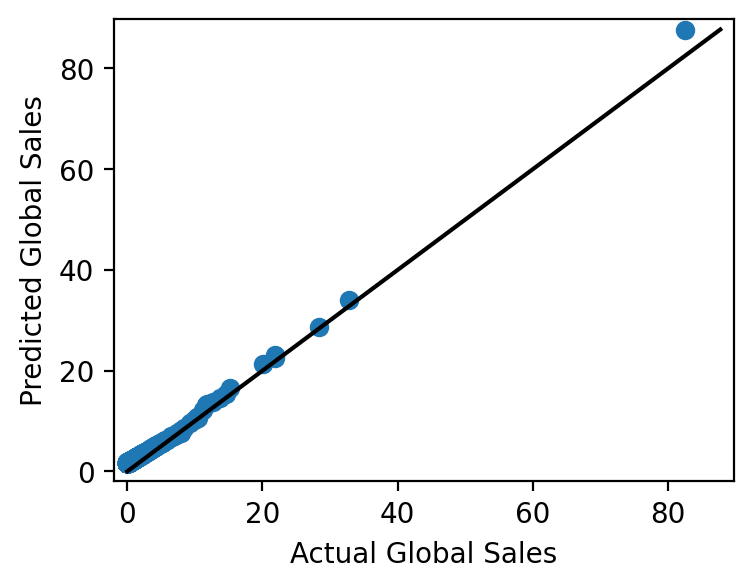

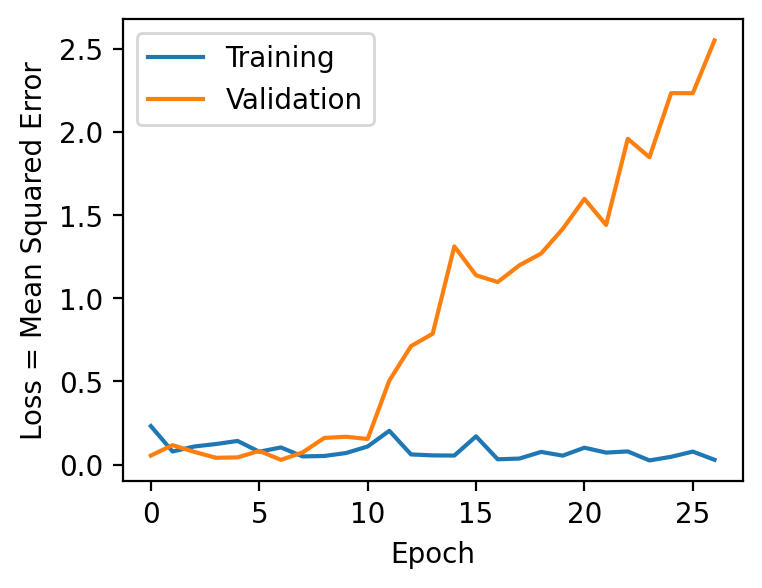

In [838]:
# Predict the model outputs for the training set.
y_pred = model.predict(x_test_scaled)

# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 200)
plt.scatter(y_test, y_pred)

# Plot a diagonal line showing the one-to-one relation.
minimum_val = min(y_test.min(), y_pred.min())
maximum_val = max(y_test.max(), y_pred.max())
plt.plot([minimum_val, maximum_val], [minimum_val, maximum_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

# Adjust dynamic Limit of range values on both axes
plt.xlim(minimum_val -2, maximum_val +2)
plt.ylim(minimum_val -2, maximum_val +2)

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch.
plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

In the early stages the model trains quicker with a larger learning rate, although in this case it actually uses more epochs in total before it
triggers the early stopping criterion. However, the errors are not much better, and in some cases the predicted values are worse.
Next, try repeating this model again but with a smaller learning rate

We see that the mean squared error loss in both the training and the validation sets are decreased rapidly.  There is a strong evidence of over-fitting here, as we can see the validation loss started increasing at later epochs while the training loss continued to decrease.

In this cases the predicted values are worse.

In [ ]:
# Next, try repeating this model again but with a smaller learning rate

In [840]:
# Create an instance of the Adam class, but set the learning_rate to 0.0001
adam_optimizer = Adam(learning_rate = 0.0001)

# Create an instance of the Sequential class. This will be our model.
model = Sequential()

# Add the first hidden layer, with input_dim = 8, 64 units, and the ReLU activation function.
model.add(Input(shape=(8,)))
model.add(Dense(units=64, activation="relu"))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit because we are predicting one value (the global sales). Also, we will use the linear
# activation function, because this is a regression problem, predicting a continuous output variable.
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model using the adam_optimizer that we created above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Define an Early Stopping criterion with a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 2.4835 - mean_squared_error: 2.4835 - val_loss: 1.9824 - val_mean_squared_error: 1.9824
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.8672 - mean_squared_error: 1.8672 - val_loss: 1.9094 - val_mean_squared_error: 1.9094
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 1.7698 - mean_squared_error: 1.7698 - val_loss: 1.8332 - val_mean_squared_error: 1.8332
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 1.5577 - mean_squared_error: 1.5577 - val_loss: 1.7508 - val_mean_squared_error: 1.7508
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 1.6782 - mean_squared_error: 1.6782 - val_loss: 1.6519 - val_mean_squared_error: 1.6519
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 1.3785 - mean_squared_error: 1.3785 - val_loss: 1.5412 - val_mean_squared_error: 1.5412
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 1.5558 - mean_squared_error: 1.

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


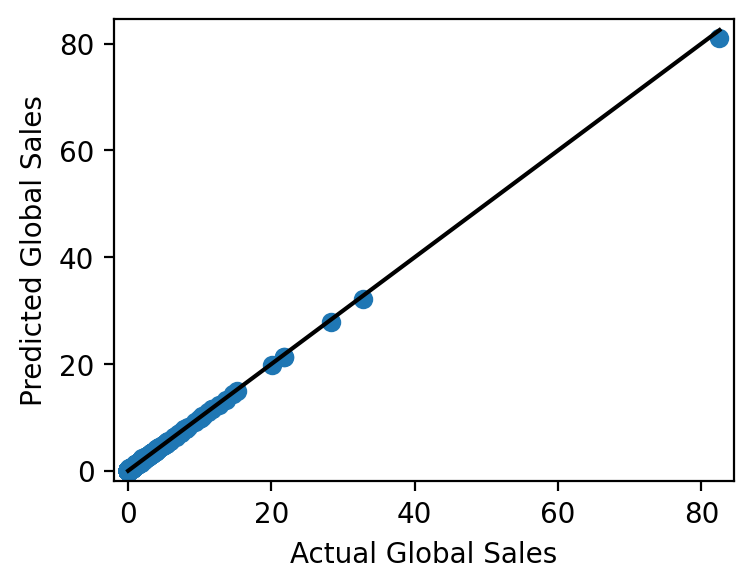

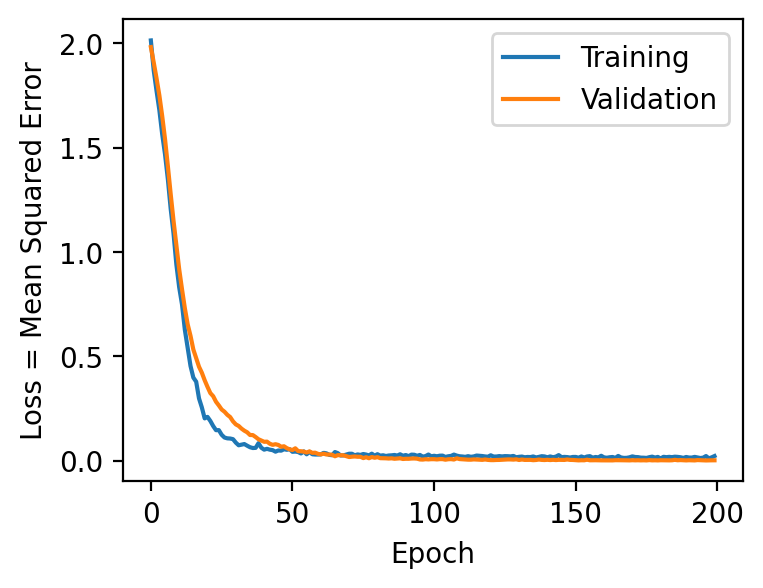

In [842]:
# Predict the model outputs for the testing set.
y_pred = model.predict(x_test_scaled)

# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 200)
plt.scatter(y_test, y_pred)

# Plot a diagonal line showing the one-to-one relation.
minimum_val = min(y_test.min(), y_pred.min())
maximum_val = max(y_test.max(), y_pred.max())
plt.plot([minimum_val, maximum_val], [minimum_val, maximum_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

# Adjust dynamic Limit of range values on both axes
plt.xlim(minimum_val -2, maximum_val +2)
plt.ylim(minimum_val -2, maximum_val +2)

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch.
plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

With a smaller learning rate, the model takes a lot longer to train. 

### Changing the dropout rate

The final hyperparameter that we will consider is the dropout rate that we imposed in the first hidden layer. We will now repeat the neural
network model but with a drop out rate of 10%

In [846]:
#Create an instance of the Sequential class. This will be our model.
model = Sequential()

# Add the first hidden layer, with input_dim = 8, 64 units, and the ReLU activation function.
model.add(Input(shape=(8,)))
model.add(Dense(units=64, activation="relu"))
#model.add(Dense(units = 64, input_dim = (8), activation = "relu"))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))

# The output layer, this will have 1 unit because we are predicting one value (the global_sales). Also, we will use the linear
# activation function, because this is a regression problem, predicting a continuous output variable.
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])

# Define an early stopping criterion with a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 1.5310 - mean_squared_error: 1.5310 - val_loss: 0.5942 - val_mean_squared_error: 0.5942
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3162 - mean_squared_error: 0.3162 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.0291 - mean_squared_error: 0.

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


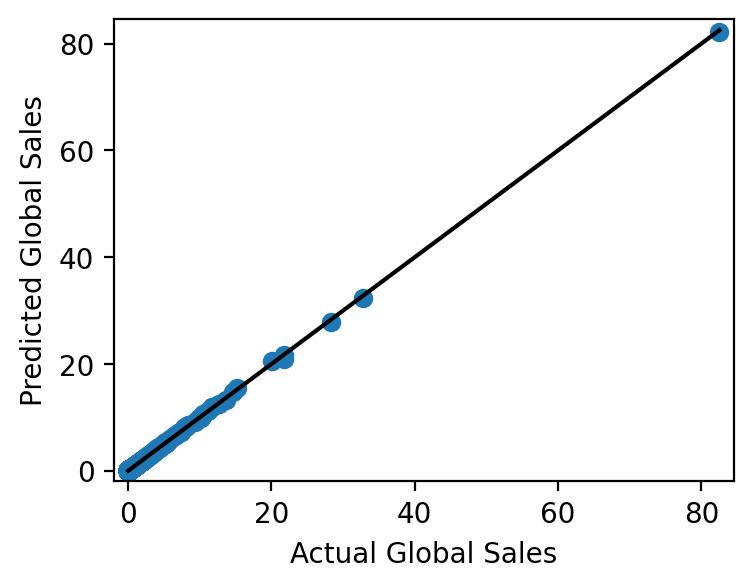

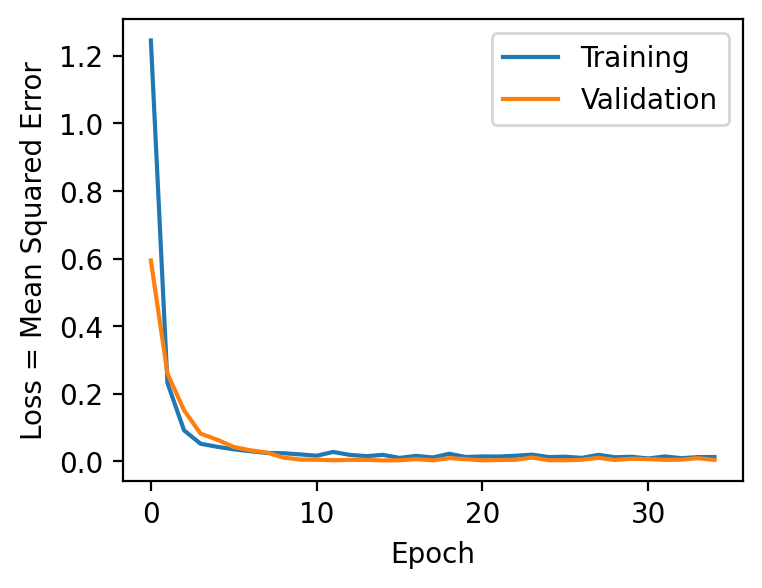

In [848]:
# Predict the model outputs for the testing set.
y_pred = model.predict(x_test_scaled)

# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 200)
plt.scatter(y_test, y_pred)

# Plot a diagonal line showing the one-to-one relation.
minimum_val = min(y_test.min(), y_pred.min())
maximum_val = max(y_test.max(), y_pred.max())
plt.plot([minimum_val, maximum_val], [minimum_val, maximum_val], 'k-')

# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

# Adjust dynamic Limit of range values on both axes
plt.xlim(minimum_val -2, maximum_val +2)
plt.ylim(minimum_val -2, maximum_val +2)

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch.
plt.figure(figsize = (4, 3), dpi = 200)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

The final mean squared errors are generally lower in this model, and we can see from the above plot that the predicted values are somewhat
closer to the actual values.
Reducing the dropout rate to 10% has improved the model, although it is only a small difference.